# **ML Project**

>## TOPIC: จัดกลุ่ม และ predict เพลงที่ติด top chart ของประเทศไทย โดยใช้ข้อมูลจาก Spotify

### <span style=color:rosybrown> สมาชิกกลุ่ม 4Ps </span>  
1. เบญชญา อนันตานานนท์ (เพลิน) 6241123026
2. ปวิตร ตุลวรรธนะ (เป ล่า) 6241133326
3. ญาณิน เลิศประภาพงศ์ (พลอย) 6241044126

### <span style=color:rosybrown> แหล่งที่มาข้อมูล </span>  
1. Playlist ที่นำมาใช้วิเคราะห์ข้อมูล (50 top songs in Thailand):
2. แรงบันดาลใจ และวิธีการ Scrape ข้อมูลต่าง ๆ จาก Spotify: https://machinelearningknowledge.ai/tutorial-how-to-use-spotipy-api-to-scrape-spotify-data/
3. การทำความเข้ากับ Spotify Web API https://developer.spotify.com/documentation/web-api/
4. ข้อมูลเกี่ยวกับ Popularity Index ที่เป็นสิ่งที่ใช้ใน Project https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/

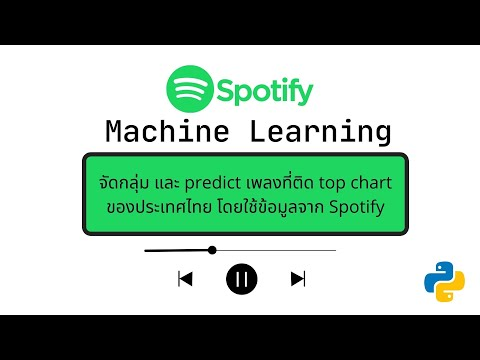

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('c1Rq0tgG7xg', width=720, height=405)

>**youtube**: https://youtu.be/c1Rq0tgG7xg

---

## <span style=color:lavenderblush> TABLE OF CONTENTS </span>
1. [General information about spotify](#0)
   - [About spotify](#1)
   - [Why spotify](#2)
   - [Company analysis](#3)
2. [Scrape data](#4)
3. [Exploratory Data Analysis (EDA)](#5)
   - [Classified songs into a group  by using tempo rate](#6)
   - [Create heatmap](#7)
   - [Radar chart](#8)
4. [Spotify music analysis](#9)
   - [Cluster model](#10)
     - [สร้าง Histrogrom หา outliner](#26)
     - [หาจำนวน cluster ที่เหมาะสม](#11)
     - [fit model with KMeans](#12)
     - [จัดหมวดหมู่ Top song](#27)
   - [Classification model](#13)
     - [เลือก model ที่เหมาะสม](#14)
     - [ความแม่นยำของ model](#15)
   - [LinearRegression model](#16)
     - [ความสัมพันธ์ attributes กับ track_popularity](#17)
     - [Popularity distribution](#18)
     - [Predict Popularity](#19)
       - [Predict ด้วย attributes ทั้งหมด](#20)
       - [Predict ด้วย attributes บางตัว](#21)
         - [ดูการกระจายตัวของ attributes](#30)
       - [Conclusion](#22)
     - [Predict ยอด streams](#23)
       - [ความสัมพันธ์ attributes กับ streams](#27)
       - [ดูการกระจายตัวของ attributes](#28)
       - [Fit model](#29)
     - [สรุปข้อสังเกตจากการ predict ค่า track_popularity และยอด streams](#24)
5. [ประโยชน์อื่นๆ](#25)

---

<a id = "0"></a>
# <span style=color:lemonchiffon> **General information about spotify** </span>  

<a id = "1"></a>
## About spotify
* Spotify เป็น audio streaming platform ที่มีจำนวนผู้ใช้งานมากถึง 422 ล้าน user ทั่วโลก อีกทั้งยังเป็น leading music streaming platform ในประเทศไทยที่ครองส่วนแบ่งตลาดมากถึง 31 % มีจำนวนผู้ใช้งานมากถึง 5.8 ล้าน users (อ้างอิงจากข้อมูลปี 2564) ซึ่งนับว่าเป็นบริษัทที่เติบโตเร็วอย่างมากเนื่องจาก Spotify เริ่มเข้าตลาด music streaming ในประเทศไทยเมื่อปี 2560 ที่ผ่านมา
* references
  * Spotify music user in Thailand - https://www.start.io/audience/spotify-music-users-in-thailand
  * Market Share - https://droidsans.com/global-music-streaming-market-share-q2-2021/

<a id = "2"></a>
## Why Spotify
* จุดเด่นที่ทำให้คนส่วนมากเลือกที่จะใช้ spotify ในการฟังเพลงคือ spotify ทำให้การค้นหาเพลงและฟังเพลงใหม่ที่เราถูกใจเป็นเรื่องที่ง่ายมาก เพราะทาง spotify จะมีการจัด playlist ในรูปแบบต่าง ๆ ที่มีการอัพเดทอย่างสม่ำเสมอ ไม่ว่าจะเป็น Daily/weekly mixed หรือ Top 50 ในแต่ละช่วงเวลา นอกจากนี้ทาง spotify มีการใช้ระบบ AI ที่เรียนรู้พฤติกรรมความชอบของผู้ฟังแต่ละบุคคล เพื่อวิเคราะห์และนำเพลงที่เหมาะสมกับ lifestyle ของ user ได้ดี Spotify จึงเป็นบริษัทที่น่าสนใจในต่อยอดและเรียนรู้การประยุกต์ใช้ Machine Learning ใน music streaming 
industry

* ด้วยความที่โลกในยุคปัจจุบันมีการเปลี่ยนแปลงอย่างรวดเร็ว มีศิลปิน นักร้องหน้าใหม่เกิดขึ้นมากมาย แพลตฟอร์ม spotify มีการจัดทำ Top 50 - Thailand ซึ่งเป็นการเก็บข้อมูลการผู้ใช้งานว่ามีการฟังเพลงอะไรมาที่สุด ณ เวลานั้น ข้อมูลตรงนี้สามารถเป็นประโยชน์ให้ Producer หรือค่ายเพลงต่างๆ มีข้อมูล insight ไปสร้างเพลงใหม่ ๆ ออกสู่ตลาดเพื่อให้ถูกใจผู้ใช้งานมากขึ้น และเมื่อผู้ใช้งานได้ฟังเพลงที่ในแนวที่ถูกใจมากขึ้นก็จะส่งผลให้ความพึงพอใจของผู้ใช้งานที่มีต่อ spotify เพิ่มสูงขึ้น รวมถึง Spotify สามารถนำข้อมูลการทำ MachineLearning ในครั้งนี้ไปปต่อยอดจัดทำ Original Content ของตัวเองเพื่อให้ตรงกับความชอบของผู้ใช้งานมากขึ้นได้อีกด้วย 

<a id = "3"></a>
## Company analysis
* จากที่ได้กล่าวไปเบื้องต้น สิ่งที่น่าสนใจของแพลตฟอร์ม spotify คือ spotify มีการพัฒนาทำ personalize content ให้เหมาะสมและถูกใจผู้ใช้งานอยู่ตลอด มีการออก Daily mixed ที่เกิดจาการผสมผสานเพลงใหม่จากหลาย ๆ genres ที่ผู้ใช้งานชอบ อีกทั้งในทุก ๆ สิ้นปี spotify มีการออกฟังก์ชั่น Spotify Wrapped ซึ่งเป็น Personalize Content ของแต่ละผู้ใช้งาน Spotify มีการนำข้อมูลพฤติการฟังและสถิติของผู้ใช้งานแต่ละคนมา วิเคราะห์และสรุปรวมเป็น content ที่สามารถให้ผู้ใช้งานแชร์ต่อออกไปได้ผ่านทาง Social Media ได้อีกด้วย spotify มีีการใช้ระบบ AI เรียนรู้พฤติกรรมของผู้ใช้งาน อีกทั้งยังมีการใช้ big data เข้ามามีส่วนร่วมในการวิเคราะห์และทำความเข้าใจรสนิยมทางดนตรีของผู้ใช้ เพื่อนำทางให้ผู้ใช้ได้ฟังแนวเพลงและศิลปินที่ใหม่ ที่ตรงกับความชอบ

* reference
  * How spotify is using big data - https://www.analyticssteps.com/blogs/how-spotify-using-big-data

รวบรวมข้อมูลเพลง **top 50 - Thailand** มา ณ วันที่ 6 พฤษภาคม 2565 โดยข้อมูลทั้งหมดจะประกอบด้วยข้อเพลง ชื่อศิลปิน และข้อมูลที่ใช้เป็นในการวัดต่าง ๆ  เช่น loundness dancebility liveness เป็นต้น

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from datetime import datetime

sns.set(style="white")


<a id = "4"></a>
# <span style=color:lemonchiffon> **Data Scraping from Spotify Web API** </span>  

สามารถปรับ playlist_link ได้เพื่อเปลี่ยน playlist ที่ต้องการดูข้อมูลได้

**install Spotipy (for Spotify Web API)**

- Command Prompt: `pip install spotipy`
- Anaconda Prompt: `conda install -c conda-forge spotipy`

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

เนื้อหาในไฟล์ authorization.json:
https://developer.spotify.com/dashboard/applications

{"client_id": "e602716cd18f42e9b97b5589c52de122",
    "client_secret":"****************"}

In [3]:
credentials = json.load(open('authorization.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 0

In [4]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbMnz8KIWsvf9?si=fb58241ff9a144fd"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
playlist_URI

'37i9dQZEVXbMnz8KIWsvf9'

In [6]:
results = sp.user_playlist(any,playlist_URI,'tracks')

In [7]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []
playlist_tracks_pop=[]
playlist_tracks_artist_gen=[]
playlist_tracks_artist_pop=[]

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    playlist_tracks_pop.append(track["track"]["popularity"])
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    playlist_tracks_artist_pop.append(artist_info["popularity"])
    playlist_tracks_artist_gen.append(artist_info["genres"])
    playlist_tracks_artists.append(artist_list)

    playlist_tracks_first_artists.append(artist_list[0])

In [8]:
features = sp.audio_features(playlist_tracks_id)

In [9]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())
features_df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.838,0.635,1,-5.929,1,0.0398,0.1360,0.0,0.0709,0.960,97.051,audio_features,70DE8f3cq3auql4JMrF0Qg,spotify:track:70DE8f3cq3auql4JMrF0Qg,https://api.spotify.com/v1/tracks/70DE8f3cq3au...,https://api.spotify.com/v1/audio-analysis/70DE...,191500,4
1,0.532,0.426,3,-6.117,1,0.0288,0.6390,0.0,0.1340,0.137,149.898,audio_features,2gzhQaCTeNgxpeB2TPllyY,spotify:track:2gzhQaCTeNgxpeB2TPllyY,https://api.spotify.com/v1/tracks/2gzhQaCTeNgx...,https://api.spotify.com/v1/audio-analysis/2gzh...,201905,3
2,0.905,0.962,4,-3.197,1,0.0856,0.0299,0.0,0.0272,0.906,129.969,audio_features,5oH4DQAuu1J1800RzUsBWa,spotify:track:5oH4DQAuu1J1800RzUsBWa,https://api.spotify.com/v1/tracks/5oH4DQAuu1J1...,https://api.spotify.com/v1/audio-analysis/5oH4...,174647,4


In [10]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
features_df['track_popularity'] = playlist_tracks_pop
features_df['artist_genre'] = playlist_tracks_artist_gen
features_df['artist_popularity'] = playlist_tracks_artist_pop

features_df = features_df[['id', 'title', 'first_artist','artist_genre','artist_popularity', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode','speechiness', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature','track_popularity']]
features_df.head()


,id,title,first_artist,artist_genre,artist_popularity,all_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity
0,70DE8f3cq3auql4JMrF0Qg,ทักครับ,Lipta,[thai pop],53,"[Lipta, GUYGEEGEE]",0.838,0.635,1,-5.929,1,0.0398,0.1360,0.0,0.0709,0.960,97.051,191500,4,61
1,2gzhQaCTeNgxpeB2TPllyY,With you,Jimin,[],74,"[Jimin, HA SUNG WOON]",0.532,0.426,3,-6.117,1,0.0288,0.6390,0.0,0.1340,0.137,149.898,201905,3,87
2,5oH4DQAuu1J1800RzUsBWa,That That (prod. & feat. SUGA of BTS),PSY,"[k-pop, k-rap, korean old school hip hop]",73,"[PSY, SUGA]",0.905,0.962,4,-3.197,1,0.0856,0.0299,0.0,0.0272,0.906,129.969,174647,4,84
3,2m6Ko3CY1qXNNja8AlugNc,Angel Baby,Troye Sivan,"[australian pop, dance pop, electropop, pop, v...",80,[Troye Sivan],0.559,0.559,11,-6.425,1,0.0358,0.0145,0.0,0.1380,0.338,72.498,220780,4,79
4,3crZQarcOagdupRZNzRGWe,ถ้าเราเจอกันอีก (Until Then),Tilly Birds,"[thai indie rock, thai pop]",60,[Tilly Birds],0.481,0.512,3,-6.365,1,0.0260,0.4960,0.0,0.1570,0.314,75.876,288250,4,65


In [11]:
date = datetime.now().strftime("%d_%m_%Y")
filename = str(f"Spotify_{date}")
csv_file = filename + '.csv'

In [12]:
features_df.to_csv(csv_file, encoding='utf-8',index=False)

รวบรวมข้อมูลเพลง **weekly top songs Thailand** มา ณ วันที่ 10 พฤษภาคม 2565 โดยข้อมูลทั้งหมดจะประกอบด้วยข้อเพลง ชื่อศิลปิน อันดับการเปลี่ยนแปลงของชาร์ทเพลง และยอมสตรีมเพลง

### column header definition
* **id** คือ id ของเพลงที่สร้างโดย spotify
*  **title** คือ ชื่อเพลง
*  **first_artist** คือ ศิลปินหลักผู้เป็นเจ้าของเพลง
*  **all_artist** คือ ศิลปินที่เข้าร่วมทำเพลงด้วย
*  **danceability** คือ ความเต้นของเพลง ดูจาก tempo, การย่ำ, ความแข็งแรงของ beat (range from 0 to 1)
*  **energy** คือ ความพุ่งของเพลง ดูจากความดัง, ความเร็ว, dynamic ของเพลง (range from 0 to 1)
*  **key** คือ key signature ของเพลง  (range from 0 to 11, starting C as 0)
*  **loudness** คือ ความดังของเพลง วัดจากค่า decibel (range from 0 to 1)
*  **mode** คือ มี major และ minor โดยดูจาก sacale ของ melody (0 = minor, 1 = major)
*  **speechiness** คือ ค่าความเป็นคำของเพลง (range from 0 to 1)
*   **acousticness** คือ ค่าความ acoustic ของเพลง (range from 0 to 1)
*   **instrumentalness** คือ ความเป็นเพลงบรรเลง (range from 0 to 1)
*   **liveness** คือ ความสดของดนตรี เช่น มาจากการบันทึกการแสดงสดมากเพียงใด (range from 0 to 1)
*   **valence** คือ ความสนุกสนาน และความมีชีชิตชีวาของเพลง (range from 0 to 1)
*   **tempo** คือ จังหวะความช้า เร็ว วัดจากค่า bgm (range from 50 to 150)

---

In [13]:
df=pd.read_csv('https://raw.githubusercontent.com/pawitr123/454_eda_data/main/Spotify_10_05_2022.csv')
df.sample(3)

,id,title,first_artist,artist_genre,artist_popularity,all_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity
7,6MjLHdROTcaU22k7B6gxR6,พิง - เพลงประกอบละคร กระเช้าสีดา,NONT TANONT,['thai pop'],54,['NONT TANONT'],0.614,0.528,10,-7.693,1,0.0346,0.393,0.00000,0.105,0.460,132.075,242727,4,63
5,2MnVrkbwL6ViB7q4NI7oVK,ฉบับปรับปรุง,ZENTYARB,['thai pop'],54,"['ZENTYARB', 'PUNYARB', 'Lazyloxy']",0.552,0.694,11,-7.436,1,0.1210,0.200,0.00000,0.112,0.419,165.951,244736,4,63
9,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,['pop'],92,['Harry Styles'],0.520,0.731,6,-5.338,0,0.0557,0.342,0.00101,0.311,0.662,173.930,167303,4,100


<a id = "5"></a>
# <span style=color:lemonchiffon> **Exploratory Data Analysis (EDA)** </span>  

1. Analysis of the features: ดูความสัมพันธ์ของแต่ละตัวแปรที่สะท้อนถึง character ของแต่ละเพลง 
* Audio Features ของแต่ละเพลงที่ spotify analyze ออกมาทั้งหมด 11 Features ซึ่งเป็นสิ่งที่สะท้อน character ของแต่ละเพลงที่แตกต่างกันออกไป โดยเพลงบน Top 50 - Thailand เป็นเพลงที่ติดชาร์ทของผู้ใช้งานในไทยที่มีการฟังมากที่สุดในสัปดาห์
โดยเราสามารถสังเกตความชอบเพลงของผู้ใช้งาน Spotify ในประเทศไทย ผ่าน Features แต่ละตัว
และ Energy คือพลังหรือความพุ่งของเพลงมีค่าตังแต่ 0.0 ถึง 1.0 ต้องดูความจังหวะความเร็วหรือช้าจาก tempo และความดังควบคู่กันไปอีกด้วย
2. Finding any relations or trends considering multiple features 
* mood: Danceability, Valence, Energy, Tempo Mood ของเพลงสามารถดูได้จาก Danceability ที่มีค่าตั้งแต่ 0 ไปถึง 1 โดยที่ 0 คือเพลงที่มีความเต้นน้อย และ 1 คือเพลงที่มีความเต้นมาก โดยที่เราต้องดู tempo หรือการย่ำจังหวะว่าเป็นจังหวะช้าหรือเร็วขนาดไหนอีกด้วย (หน่วย:bpm) นอกจากนี้ Valence มีค่าตั้งแต่ 0.0 ถึง 1.0 ถ้าเพลงมีความสนุกสนานก็จะได้คะแนนสูง แต่ถ้าหาเพลงช้าหรือเพลงเศร้าจะมีค่าต่ำลงมา


In [14]:
ed = df[['title','first_artist','danceability','energy','key','loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','track_popularity']]
ed.sample(5)

,title,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_popularity
15,ต่อจากนี้เพลงรักทุกเพลงจะเป็นของเธอเท่านั้น,No One Else,0.502,0.637,9,-6.214,1,0.0437,0.22100,0.0,0.2120,0.485,169.896,62
35,เอาปากกามาวง,BELL WARISARA,0.728,0.572,2,-6.933,1,0.0330,0.40200,0.0,0.1480,0.682,89.987,59
33,ลา ลา ลา,Dept,0.394,0.719,9,-6.071,1,0.0259,0.00998,0.0,0.0528,0.240,178.005,56
19,ทราบแล้วเปลี่ยน - attention please,BOWKYLION,0.714,0.461,5,-8.484,0,0.0334,0.52800,0.0,0.3790,0.785,91.034,60
11,DARARI,TREASURE,0.716,0.638,0,-6.870,1,0.0392,0.48600,0.0,0.0702,0.552,84.955,82


<a id = "6"></a>
## Classified songs into a group by using tempo rate

In [15]:
ed['class']=ed['tempo'].apply(lambda x:'slow tempo markings' if x <= 98 else
                ('moderate tempo markings' if  98 < x <= 128 else
                ('fast tempo markings' if 128 < x < 200 else 'other')))
ed.head()

/var/folders/xx/xfkg31rs5xd4yfzbd0xx8vd40000gn/T/ipykernel_22531/840559565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed['class']=ed['tempo'].apply(lambda x:'slow tempo markings' if x <= 98 else


,title,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_popularity,class
0,ทักครับ,Lipta,0.838,0.635,1,-5.929,1,0.0398,0.1360,0.0,0.0709,0.960,97.051,60,slow tempo markings
1,ถ้าเราเจอกันอีก (Until Then),Tilly Birds,0.481,0.512,3,-6.365,1,0.0260,0.4960,0.0,0.1570,0.314,75.876,65,slow tempo markings
2,That That (prod. & feat. SUGA of BTS),PSY,0.905,0.962,4,-3.197,1,0.0856,0.0299,0.0,0.0272,0.906,129.969,83,fast tempo markings
3,With you,Jimin,0.532,0.426,3,-6.117,1,0.0288,0.6390,0.0,0.1340,0.137,149.898,87,fast tempo markings
4,Angel Baby,Troye Sivan,0.559,0.559,11,-6.425,1,0.0358,0.0145,0.0,0.1380,0.338,72.498,79,slow tempo markings


สร้าง class โดยแบ่งตาม tempo หรือจังหวะในแต่ละเพลง 
- ถ้าค่า tempo มีค่าต่ำกว่า 98 Beats per minute จะถูกจัดอยู่ในกลุ่ม slow tempo markings
- ถ้าค่า tempo มีค่าอยู่ระหว่าง 99 ถึง 128 Beats per minute จะถูกจัดอยู่ในกลุ่ม moderate tempo markings
- ถ้าค่า tempo มีค่าอยู่ระหว่าง 129 ไปจนถึง 200 Beats per minute จะถูกจัดอยู่ในกลุ่ม fast tempo markings

Reference: https://theonlinemetronome.com/blogs/12/tempo-markings-defined


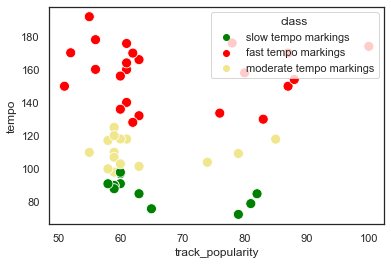

In [16]:
from matplotlib import rcParams
sns.scatterplot(x="track_popularity", y="tempo" ,hue="class",s=100,
                palette=dict({'slow tempo markings':'green','moderate tempo markings':'khaki','fast tempo markings': 'red'})
                ,data=ed)
rcParams['figure.figsize'] = 10,6

จาก scatter plot เป็นการแสดงการจัดกลุ่มเพลงที่ติด Top 50 - Thailand ซึ่งแบ่งโดย tempo เฉลี่ยของแต่ละเพลง โดยเราจะสังเกตได้จาก plot จุดสีแดง เพลงส่วนใหญ่จะมี tempo เร็ว 

<a id = "7"></a>
## Create heatmap to see correlation between each features

<AxesSubplot:>

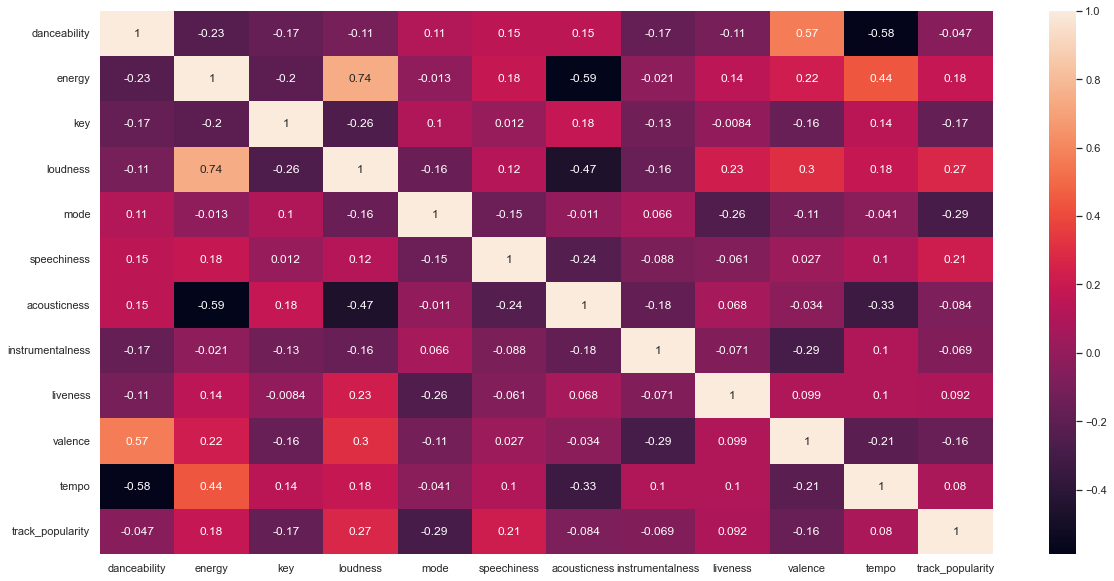

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(ed.corr(),annot = True)

- create heatmap to see correlation between each features
1. Energy และ Loudness มี correlation มีค่าสูงที่สุดอยู่ที่ 0.74 ซึ่งมีความสัมพันธ์ไปในทางบวก เพลงที่มีทำนองหรือมีดนตรีดังก็จะเป็นเพลงเร็วที่ฟังแล้วรู้สึกมีพลัง 
2. Danceability และ Valence ก็มีความสัมพันธ์ไปในทางเดียวกันเนื่องจากเพลงเต้นส่่วนใหญ่จะมีความสนุกในทำนองนั้นเอง
3. Danceability and tempo correlation แสดงให้เห็นว่ามีความสัมพันธ์ติดลบอยู่ที่ -0.58 เนื่องจากเมื่อคิดตามความเป็นจริง การที่เพลงมีความดีดหรือเพลงเต้นก็ควรจะมีจังหวะเร็ว แต่จากข้อมูลตรงนี้ทำให้เราเห็นว่าไม่ใช่เสมอไป
4. เพลงทีมีความ acoustic สูงก็จะเป็นเพลงที่ low Energy เพราะทั้ง 2 ตัวนี้มีค่า correlation อยู่ที่ -0.59 ซึ่งเป็นความสัมพันธ์ในทิศทางลบ

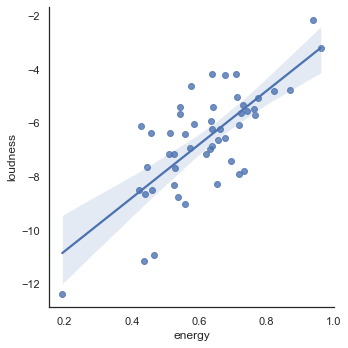

In [18]:
sns.lmplot(x='energy',y='loudness',data=ed, palette='RdPu')

* กราฟแสดงถึงความสัมพันธ์ของ loudness และ energy ของ Top 50 บน spotify เพลงส่วนมากที่ติด Top Chart มีลักษณะมีความดังและเป็นเพลงเร็วอยู่ในช่วงปานกลาง ซึ่งเกาะกลุ่มกัน


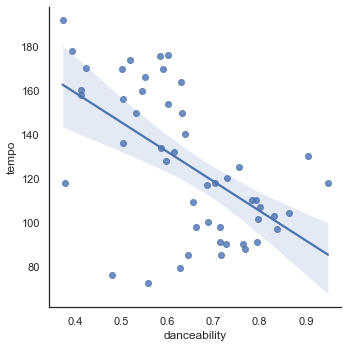

In [19]:
sns.lmplot(x='danceability',y='tempo',data=ed, palette='RdPu')


- กราฟแสดงความสัมพันธ์ของ features danceability และ tempo ที่มี correlation ติดลบ ซึ่งหมายความว่าเพลงที่มีจังหวะดนตรีเร็วก็จะไม่ได้มีค่า danceability หรือมีความเป็นเพลงเต้นสูงอย่างเช่นเพลง rap มีจังหวะเร็วแต่ danceable ต่ำ 

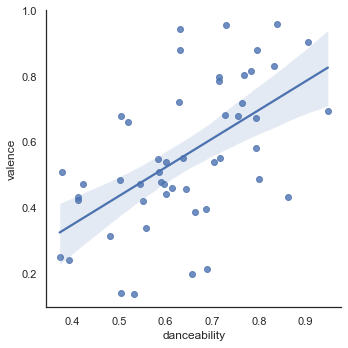

In [20]:
sns.lmplot(x='danceability',y='valence',data=ed, palette='RdPu')

- กราฟแสดงความสัมพันธ์ของ features danceability และ valence ซึ่งเพลงที่มีค่า danceability สูงเพลงนั้นก็จะมีค่าความสนุกหรือ valence สูงตามไปด้วยเป็น ความสัมพันธ์กันในเชิงบวก

<a id = "8"></a>
## Radar Chart

In [21]:
er = ed.drop(columns=['title', 'key','loudness','first_artist','tempo','instrumentalness','mode','track_popularity','class'])
er.describe()

,danceability,energy,speechiness,acousticness,liveness,valence
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.641540,0.619220,0.059224,0.297436,0.175392,0.558580
std,0.142289,0.143463,0.043510,0.253701,0.116056,0.219458
min,0.373000,0.193000,0.025500,0.002730,0.027200,0.137000
25%,0.546750,0.525750,0.033175,0.079975,0.098850,0.432000
50%,0.634500,0.636000,0.042350,0.217000,0.129500,0.523500
75%,0.749250,0.716750,0.062850,0.493500,0.212000,0.713750
max,0.948000,0.962000,0.215000,0.857000,0.491000,0.960000


drop column ที่ไม่ได้ใช้ เหลือเพียง Audio Features ต่าง ๆ ที่ใช้ในการดูแนวเพลง 
- features ที่เก็บไว้ ได้แก่ danceability, energy, speechiness, acousticness, liveness และ valence
- features ที่ drop ออกจากตารางเนื่องจากไม่มีความเกี่ยวข้องกับแนวเพลง หรือเป็น subset ของ factors อื่นอยู่แล้ว

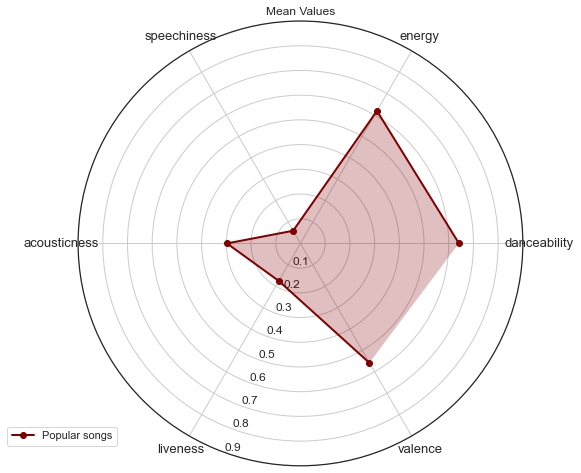

In [22]:

labels = list(er)
features = er.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features, 'o-', linewidth=2, label = "Popular songs", color= 'maroon')
ax.fill(angles, features, alpha=0.25, facecolor='maroon')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8, 0.9], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7','0.8','0.9'  ], size=12)
plt.ylim(0,0.9)

ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

radar plot แสดงถึงค่าเฉลี่ยของ features (energy,danceability,valence,liveness,acousticness,speechiness) ที่อยู่ใน Playlist Top 50 สามารถสรุปได้ว่า 
- เพลงส่วนมากจะมีลักษณะ energetic และ danceable โดยมี valence หรือความสนุกอยู่ประมาณ 0.55
- ค่าเฉลี่ย acousticness liveness และ speechiness เป็น 3 ตัวที่มีค่าเฉลี่ยต่ำรองลงมา

-----

<a id = "9"></a>
# <span style=color:lemonchiffon> **Spotify music analysis** </span>  

<a id = "10"></a>
## การใช้ Machine Learning: Clustering เพื่อดูกลุ่มของเพลงไทยในด้านต่าง ๆ ตาม Audio Features

โดยที่จะแบ่งเป็นในเรื่องเนื้อหาของ
- Mood: Danceability, Valence, Energy, Tempo
- Properties: Loudness, Speechiness, Instrumentalness
- Context: Liveness, Acousticness

ข้อมูลที่ใช้
- เพลงที่ติด Top 50 ของ Thailand ในวันดังกล่าว

In [23]:
df=pd.read_csv('https://raw.githubusercontent.com/pawitr123/454_eda_data/main/Spotify_10_05_2022.csv')
df.sample(5)

,id,title,first_artist,artist_genre,artist_popularity,all_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity
27,08OtCoRVu0sHp8dmCddtvg,หากเธอเคยรักใคร (IF YOU LOVE),Waii,"['thai pop', 'thai teen pop']",48,"['Waii', 'Koen']",0.663,0.557,2,-9.040,1,0.0725,0.187,0.000000,0.0871,0.386,97.939,215485,4,60
44,7bHqlO1utHAs2yknWvVt1C,นอนไม่หลับ (Melatonin),Safeplanet,"['thai indie pop', 'thai pop']",53,['Safeplanet'],0.373,0.733,8,-7.787,1,0.0374,0.013,0.001810,0.1160,0.249,191.873,219062,4,55
32,15Xn4r9FY3725iHIfyq5hE,คำถาม,PUNYARB,['thai pop rap'],55,['PUNYARB'],0.800,0.524,10,-8.313,1,0.0535,0.629,0.000000,0.0787,0.486,106.985,206361,4,59
18,3Js0tYhiLhVXHskoOF0jLh,บานปลาย (best wishes),BOWKYLION,"['thai indie pop', 'thai pop']",56,['BOWKYLION'],0.584,0.656,6,-6.632,1,0.0413,0.568,0.000012,0.0791,0.547,175.718,289777,4,61
5,2MnVrkbwL6ViB7q4NI7oVK,ฉบับปรับปรุง,ZENTYARB,['thai pop'],54,"['ZENTYARB', 'PUNYARB', 'Lazyloxy']",0.552,0.694,11,-7.436,1,0.1210,0.200,0.000000,0.1120,0.419,165.951,244736,4,63


### Drop column ที่ไม่ได้ใช้ ให้เหลือแค่ Audio Features ต่าง ๆ ที่ใช้ในการจัดกลุ่มเพื่อ ดูแนวเพลง แล้วตั้งชื่อในหมวดหมู่ที่เข้าใจง่าย
#### โดยสิ่งที่จะเก็บไว้คือ
- Danceability คือเพลงที่มีความน่าเต้นสูง ฟังแล้วรู้สึกอยากขยับตัว
- Valence คือความสุขของเพลง โดยเพลงที่มีค่าสูงคือเพลงที่มีความสุข ส่วนเพลงที่มีค่าต่ำคือเพลงเศร้า
- Energy คือเพลงที่มีพลังงานสูง คือเร็ว ดัง และ noisy ตัวอย่างเช่น เพลง Metal จะมี Energy ที่สูง และ Bach Prelude จะมี Energy ที่ต่ำ
- Liveness คือความเป็น Live ของเพลง เช่น เพลงที่มีค่าสูง มีแนวโน้มที่จะเป็นเพลงที่อัดจาก Live ส่วนเพลงที่มีค่าต่ำจะมี Auto tune ที่หนักกว่า หรือ record จาก Studio
- Acousticness คือเพลงที่มีความเป็น Acoustic ฟังสบาย ๆ
- Speechiness คือค่าความเป็นคำของเพลง ซึ่ง Podcast หรือ Audio book ที่ไม่มีเพลงเลยก็จะเป็น 1
#### แต่สิ่งที่จะ Drop เนื่องจากไม่ได้กำหนดถึงแนวเพลง หรือเป็น Subset ของหลาย ๆ อันอยู่แล้ว
- Tempo คือความเร็ว หรือจังหวะเพลง ซึ่งจะเป็นส่วนหนึ่งของ Energy
- Loudness คือความดังโดยวัดจาก dB ของเพลงจะตัดเพราะเป็นส่วนหนึ่งของ Energy เช่นเดียวกัน
- Instrumental คือความเป็นดนตรีที่ไม่มีเสียงร้อง ของเพลงซึ่งแทบทุกเพลงจะเป็น 0 จึงตัดออก
- ส่วนอื่นที่ไม่ได้เกี่ยวข้องกับการเป็นแนวเพลง เช่น เวลา หรือจังหวะในห้องจังหวะ หรือความดัง

In [24]:
dfm1 = df.drop(columns=['id', 'first_artist', 'artist_genre',
       'artist_popularity', 'all_artists','duration_ms',
       'time_signature', 'track_popularity','mode','tempo','mode','instrumentalness', 'key', 'loudness'])
dfm1.head()

,title,danceability,energy,speechiness,acousticness,liveness,valence
0,ทักครับ,0.838,0.635,0.0398,0.1360,0.0709,0.960
1,ถ้าเราเจอกันอีก (Until Then),0.481,0.512,0.0260,0.4960,0.1570,0.314
2,That That (prod. & feat. SUGA of BTS),0.905,0.962,0.0856,0.0299,0.0272,0.906
3,With you,0.532,0.426,0.0288,0.6390,0.1340,0.137
4,Angel Baby,0.559,0.559,0.0358,0.0145,0.1380,0.338


จัดทำเป็น Pair Plot เพื่อดูความสัมพันธ์กัน

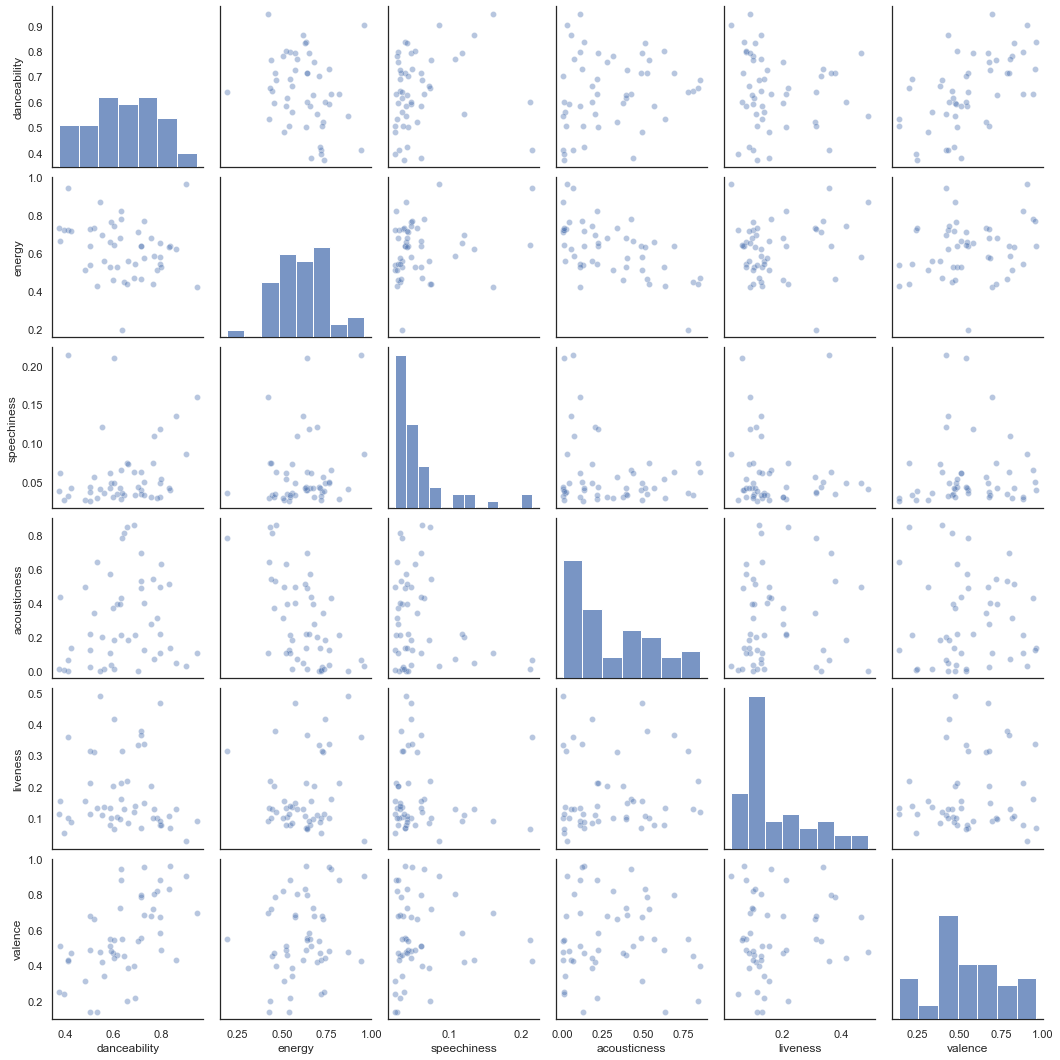

In [25]:
sns.pairplot(dfm1, vars=['danceability', 'energy', 'speechiness', 'acousticness', 'liveness',
       'valence'],
             markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

ต้องการที่จะดู 10 อันดับแรกว่ามีข้อมูลที่ใกล้กันเพื่อให้ Cluster กันได้ไหม หรือมีความสัมพันธืกันพอที่จะสามารถจับกลุ่มได้ไหม
ซึ่งกราฟที่สามารถดูแต่ละตัวแปรได้ก็คือ Radar Chart ซึ่งเป็นแสดงถึง 6 Attribute ของการที่จะเป็นเพลงที่ดัง

In [26]:
factors = ['danceability', 'energy', 'speechiness', 'acousticness', 'liveness',
       'valence']

new_max = 100
new_min = 0
new_range = new_max - new_min

for factor in factors:
  max_val = dfm1[factor].max()
  min_val = dfm1[factor].min()
  val_range = max_val - min_val
  dfm1[factor + '_Adj'] = dfm1[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)

dft = dfm1.loc[:, ['danceability_Adj', 'energy_Adj', 'speechiness_Adj', 'acousticness_Adj', 'liveness_Adj',
       'valence_Adj']]

dft.rename(columns={
    'danceability_Adj': 'danceability',
    'energy_Adj': 'energy',
    'speechiness_Adj': 'speechiness',
    'acousticness_Adj': 'acousticness',
    'liveness_Adj': 'liveness',
    'valence_Adj':'valence'
}, inplace=True)

dft['rank'] = np.arange(len(dft))+1
dft['rank'] = dft['rank'].astype(str)

dft.head()

,danceability,energy,speechiness,acousticness,liveness,valence,rank
0,80.869565,57.477243,7.546174,15.600454,9.422165,100.000000,1
1,18.782609,41.482445,0.263852,57.741698,27.986201,21.506683,2
2,92.521739,100.000000,31.715040,3.180493,0.000000,93.438639,3
3,27.652174,30.299090,1.741425,74.481136,23.027167,0.000000,4
4,32.347826,47.594278,5.435356,1.377785,23.889608,24.422843,5


In [27]:
dft1 = dft[['rank','danceability', 'energy', 'speechiness', 'acousticness', 'liveness',
       'valence']]

dfradar = dft1.head(6)

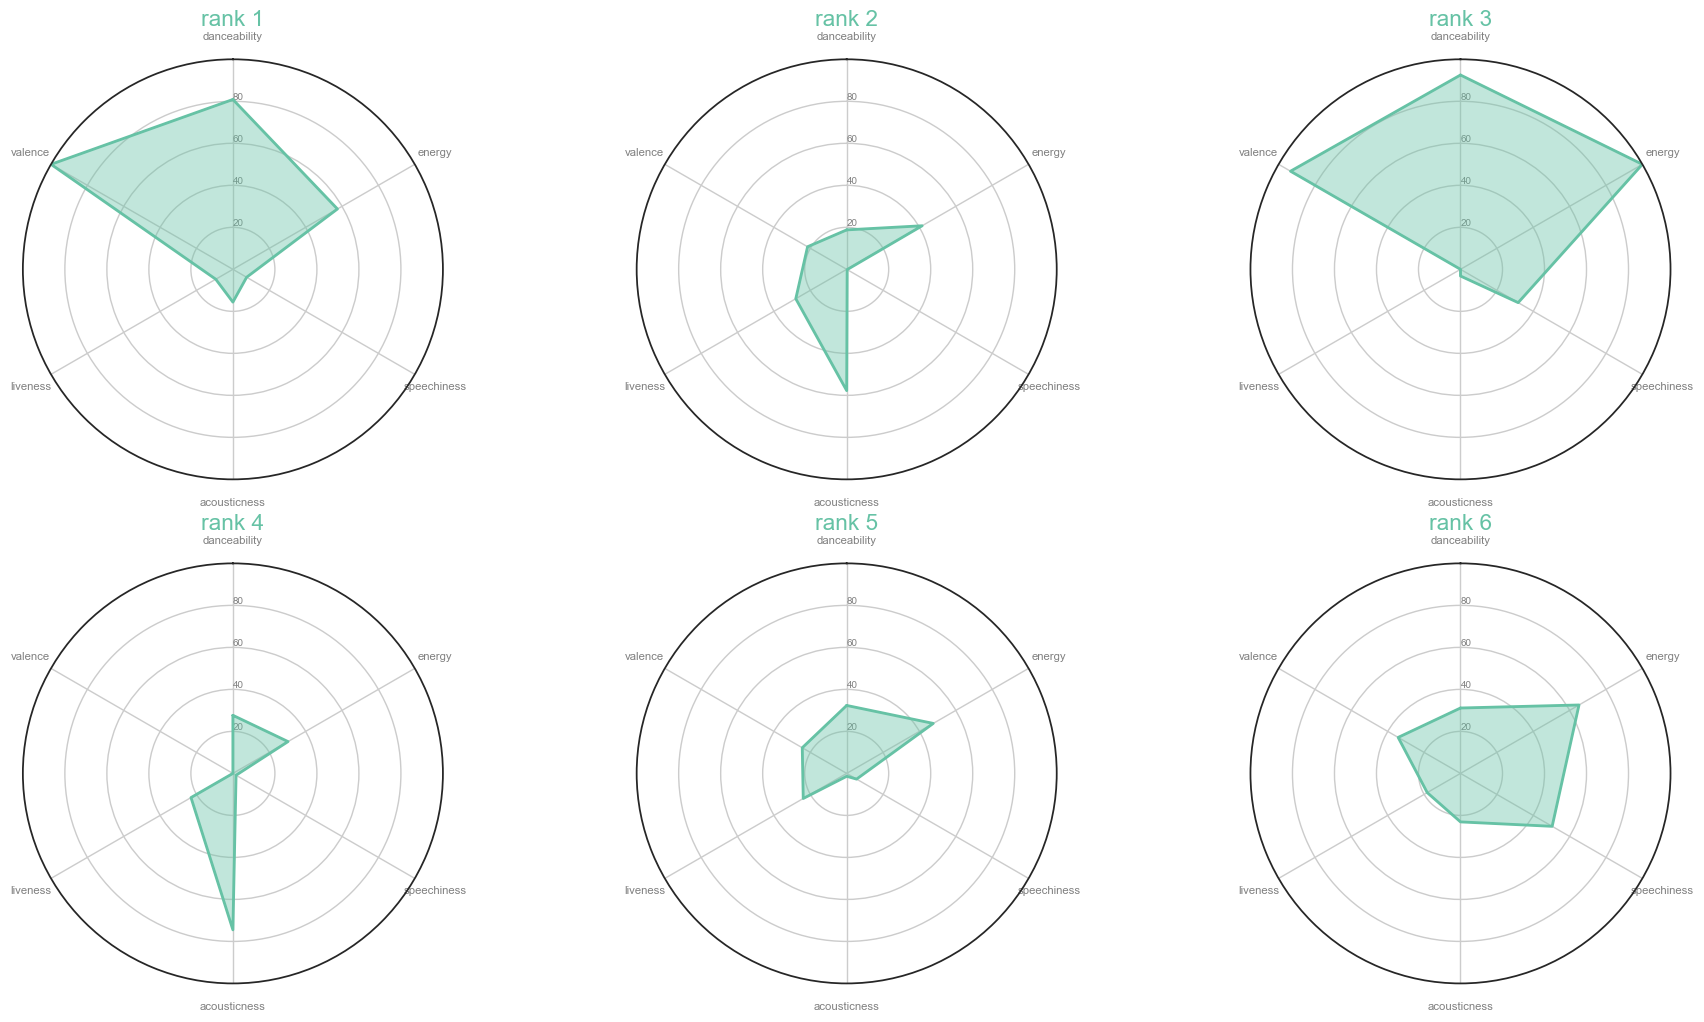

In [28]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    categories=list(dfradar)[1:]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2,3,row+1, polar=True,)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)


    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([20,40,60,80], ["20","40","60","80"], color="grey", size=7)
    plt.ylim(0,100)

    values=dfradar.loc[row].drop('rank').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=16, color=color, y=1.06)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=102
plt.figure(figsize=(22, 12), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(dfradar.index)):
    make_spider( row=row, title='rank '+dfradar['rank'][row], color=my_palette(row))

จะเห็นได้ว่าจาก Radar Chart นั้นใน 6 เพลงนี้มีหลายเพลงที่มีความคล้ายคลึงกันค่อนข้างสูง เช่นเพลงที่เป็นอันดับ 1 กับอันดับที่ 3 ฉะนั้นเราจะเอาทั้ง 50 เพลงมาจับกลุ่มว่าคนไทยนั้นชอบเพลงแบบไหน แล้วเราจะแยกเป็นชื่อที่เราตั้งเองโดยที่ไม่ได้อิงจาก Genre ของเพลงนั้น ๆ

In [29]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [30]:
cols=['danceability', 'energy', 'speechiness', 'acousticness',
       'liveness', 'valence']
## z-score
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
mat = pt.fit_transform(dfm1[cols])
mat[:5].round(4)

array([[ 1.4022,  0.0988, -0.3857, -0.5547, -1.209 ,  1.7953],
       [-1.1382, -0.7616, -1.396 ,  0.9163,  0.165 , -1.1319],
       [ 1.8889,  2.4752,  1.2444, -1.2263, -2.3016,  1.5647],
       [-0.7811, -1.3515, -1.1602,  1.2948, -0.1267, -2.0142],
       [-0.5912, -0.4351, -0.6418, -1.3376, -0.0727, -1.0154]])

In [31]:
bc_cols = [f'bc_{c}' for c in cols]
bc_cols

['bc_danceability',
 'bc_energy',
 'bc_speechiness',
 'bc_acousticness',
 'bc_liveness',
 'bc_valence']

In [32]:
ds=pd.concat([dfm1, pd.DataFrame(mat, columns=bc_cols)], axis='columns')
ds.head()

,title,danceability,energy,speechiness,acousticness,liveness,valence,danceability_Adj,energy_Adj,speechiness_Adj,acousticness_Adj,liveness_Adj,valence_Adj,bc_danceability,bc_energy,bc_speechiness,bc_acousticness,bc_liveness,bc_valence
0,ทักครับ,0.838,0.635,0.0398,0.1360,0.0709,0.960,80.869565,57.477243,7.546174,15.600454,9.422165,100.000000,1.402182,0.098800,-0.385682,-0.554747,-1.209036,1.795266
1,ถ้าเราเจอกันอีก (Until Then),0.481,0.512,0.0260,0.4960,0.1570,0.314,18.782609,41.482445,0.263852,57.741698,27.986201,21.506683,-1.138156,-0.761636,-1.395990,0.916275,0.164950,-1.131871
2,That That (prod. & feat. SUGA of BTS),0.905,0.962,0.0856,0.0299,0.0272,0.906,92.521739,100.000000,31.715040,3.180493,0.000000,93.438639,1.888883,2.475153,1.244436,-1.226253,-2.301573,1.564652
3,With you,0.532,0.426,0.0288,0.6390,0.1340,0.137,27.652174,30.299090,1.741425,74.481136,23.027167,0.000000,-0.781057,-1.351512,-1.160219,1.294776,-0.126731,-2.014170
4,Angel Baby,0.559,0.559,0.0358,0.0145,0.1380,0.338,32.347826,47.594278,5.435356,1.377785,23.889608,24.422843,-0.591183,-0.435135,-0.641774,-1.337578,-0.072714,-1.015432


<a id = "26"></a>
### สร้าง Graph Histogram เพื่อดูข้อมูลว่ามี Outlier ไหนที่ดูเหมือนข้อมูลผิดหรือไม่

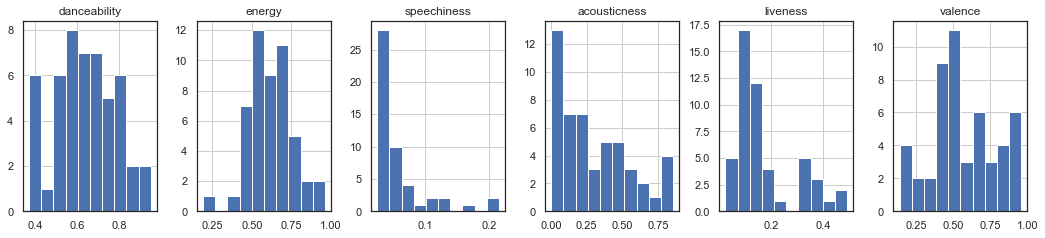

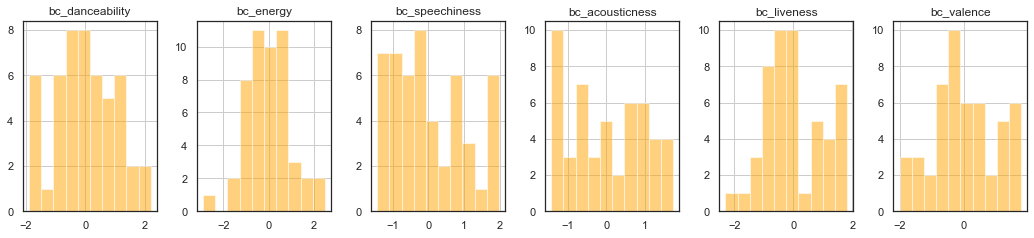

In [33]:
dfm1[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));
ds[bc_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange', alpha=.5);

ซึ่งสรุปได้ว่า ยังไม่มีข้อมูลใดที่เป็น Outlier

<a id = "11"></a>
### เริ่มการ Clustering เป็นกลุ่มตามค่าต่าง ๆ ของ Audio Features

In [34]:
from sklearn.cluster import KMeans

X=pd.DataFrame(mat, columns=cols)
X.sample(5)

,danceability,energy,speechiness,acousticness,liveness,valence
29,-1.617969,0.690095,-0.986848,-1.418660,-0.616315,-0.566012
43,0.316425,-1.071528,0.675464,1.742172,-0.312764,-0.746452
32,1.127468,-0.678547,0.313862,1.270841,-1.047899,-0.312358
20,-0.977365,0.733162,-0.581787,-1.261247,1.337648,0.574332
3,-0.781057,-1.351512,-1.160219,1.294776,-0.126731,-2.014170


### หาจำนวน Cluster ที่เหมาะกับ Data set Top 50 เพลงในไทย ณ ปัจจุบัน
ด้วยวิธี Elbow Method โดยที่ทางทีมผู้ทำจะตั้งเกณณ์ไว้ว่า ถ้าหากว่าค่า Change ของ Inertia ในแต่ละจุดต่ำกว่า 10 แล้ว จะใช้จุดนั้นเป็น K ของการ Clustering แต่จะดูจากข้อมูลภายหลังใน Heat map ด้วย

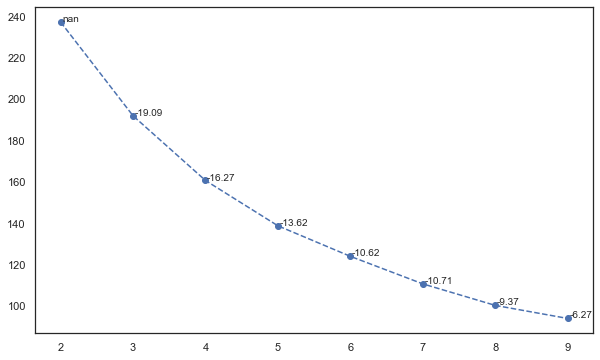

In [35]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k, random_state=10)
    m.fit(X)
    ssd.append([k, m.inertia_])
xy=np.array(ssd)
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd['pct_chg']=dd['ssd'].pct_change() * 100
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

<a id = "12"></a>
### Fit Model ด้วย KMeans Clustering

In [36]:
model = KMeans(n_clusters=7,random_state=10)
model.fit(X)
model.cluster_centers_.round(4)
model.transform(X)[:5]

array([[2.80461538, 3.98676192, 1.63945617, 3.32890963, 4.06030638,
        4.01643908, 2.50924176],
       [3.4161909 , 2.56854092, 3.20249951, 2.62160551, 1.3681612 ,
        3.3310686 , 4.80773869],
       [4.8367961 , 5.25196287, 4.15015698, 4.66761253, 6.25117072,
        5.17265081, 2.99879974],
       [4.22015635, 3.24198798, 3.68887199, 3.0827646 , 1.41663355,
        4.17832862, 5.11933927],
       [3.39363008, 1.23706432, 3.07674558, 2.17899627, 2.60287728,
        2.48126654, 3.50264675]])

### ดูข้อมูลว่าการตั้ง K ณ 7 จุดนั้น เป็นค่าที่สมควรแล้วจริง ๆ หรือไม่

In [37]:
dfm1['cluster']=model.labels_
dfm1.head()

,title,danceability,energy,speechiness,acousticness,liveness,valence,danceability_Adj,energy_Adj,speechiness_Adj,acousticness_Adj,liveness_Adj,valence_Adj,cluster
0,ทักครับ,0.838,0.635,0.0398,0.1360,0.0709,0.960,80.869565,57.477243,7.546174,15.600454,9.422165,100.000000,2
1,ถ้าเราเจอกันอีก (Until Then),0.481,0.512,0.0260,0.4960,0.1570,0.314,18.782609,41.482445,0.263852,57.741698,27.986201,21.506683,4
2,That That (prod. & feat. SUGA of BTS),0.905,0.962,0.0856,0.0299,0.0272,0.906,92.521739,100.000000,31.715040,3.180493,0.000000,93.438639,6
3,With you,0.532,0.426,0.0288,0.6390,0.1340,0.137,27.652174,30.299090,1.741425,74.481136,23.027167,0.000000,4
4,Angel Baby,0.559,0.559,0.0358,0.0145,0.1380,0.338,32.347826,47.594278,5.435356,1.377785,23.889608,24.422843,1


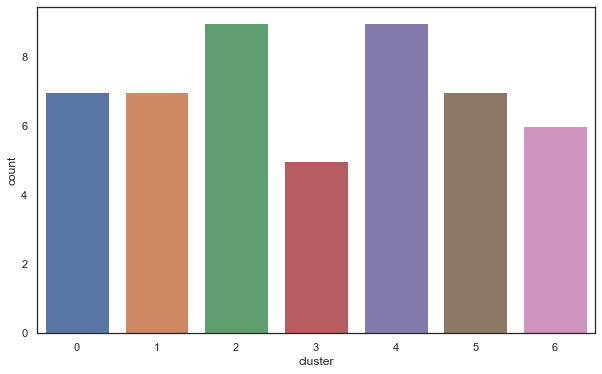

In [38]:
sns.countplot(x='cluster', data=dfm1);

สังเกตได้ว่า
-  Cluster ที่ 2,4 ที่มีจำนวนมากสุด อยู่ที่ 9 เพลง 
-  Cluster ที่ 3 ที่มีจำนวนน้อยที่สุด อยู่ที่ 5 เพลง

- ซึ่งจากข้อมูลที่มีดังกล่าว ถือว่าโอเคแล้ว เนื่องจากถ้าหากว่าเพิ่มจุดไป จำนวนในหมวดหมู่อาจจะน้อยเกิน

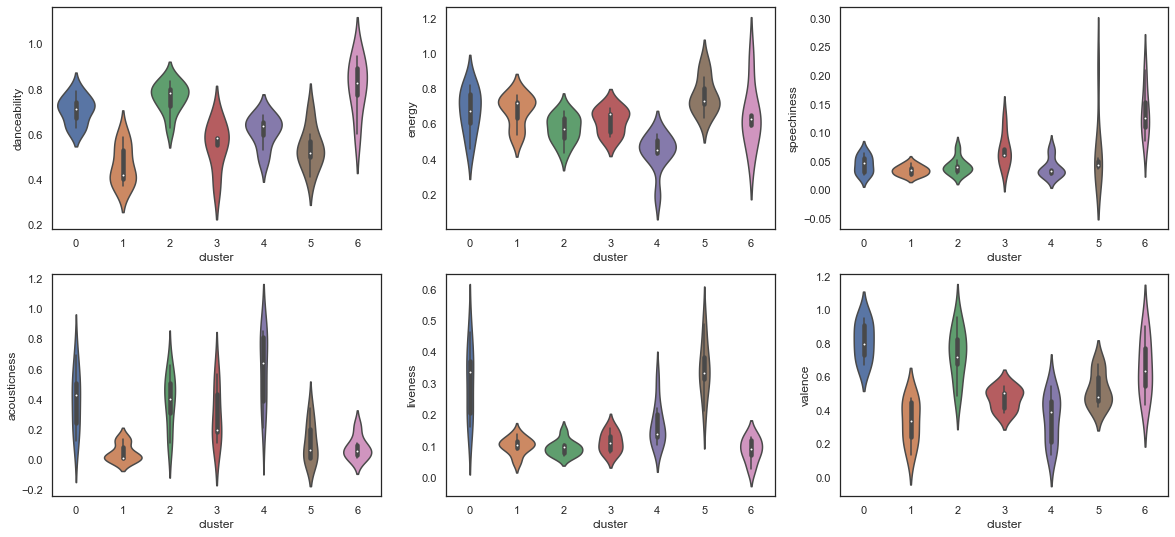

In [39]:
cols=['danceability', 'energy', 'speechiness', 'acousticness',
       'liveness', 'valence']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=dfm1, ax=ax[i])

### ต่อมาจะเอาข้อมูลที่ผ่านการ Scale ด้วยวิธี Yeo-Johnson มาทำเป็น Heat map

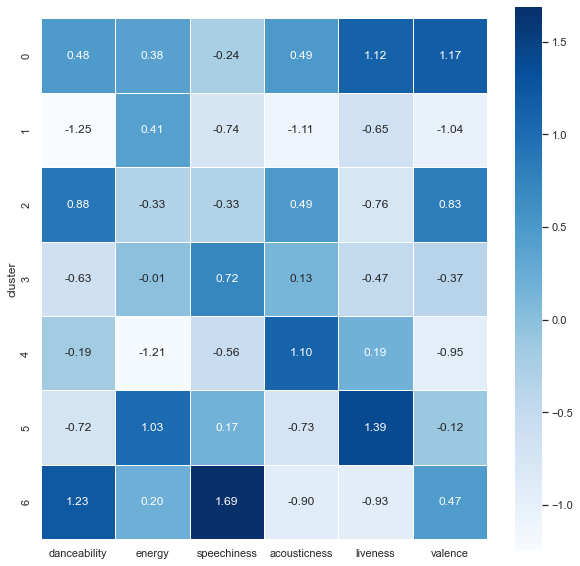

In [40]:
dx=X
dx['cluster']=model.labels_
cols=['danceability', 'energy', 'speechiness', 'acousticness',
       'liveness', 'valence', 'cluster']
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dx[cols].groupby('cluster').mean(), cmap="Blues", linewidths=1, 
            square=True, annot=True, fmt='.2f');

### การตั้งชื่อ เรียงตาม เลขของ Cluster เทียบกับเพลงอื่น ๆ ใน 50 เพลง
1. **เพลงฟังชิว (Chilling Acoustic):** ซึ่งเป็นเพลงที่มี Valence, Acousticness, Liveness, Danceability ที่ค่อนข้างสูงปานกลาง ซึ่งมีความใกล้เคียงเพลงฟังชิวมากที่สุด ให้ Mood เหมือนกับฟังเพลงดนตรีสดที่ทะเล
2. **เพลง เศร้า (Sad song):** ซึ่งเป็นเพลงที่มี Valence ต่ำ และค่าทุกอย่างที่ต่ำ ซึ่งมีแนวโน้มคล้ายกับเพลงกึ่ง Indie ที่เอาไว้ฟังตอน mood เศร้า ๆ ที่ไม่สามารถเต้นได้ หรือมีความ Acoustic ซึ่งเป็นการฟังชิว ๆ ที่ต่ำ
3. **เพลง มีความสุข (Happy song):** ซึ่งเป็นเพลงที่มี Valence ที่สูง ที่มีทั้งความชิว แล้วก็มีทั้ง Energy ที่สูงปานกลาง ที่ฟังแล้วให้ Mood อยากขยับตัวหรือโผยกหัวตาม
4. **เพลง Hiphop ช้า (Slow Hiphop):** ซึ่งเป็นเพลงที่เป็นเพลงในหมวด Rap ที่มีเนื้อร้องที่เยอะ แต่ไม่ใช่ถึงกับ Rap ที่ค่อนข้าง Hardcore แบบเพลง Trap ต่าง ๆ ดูได้จาก Energy ที่ต่ำ และมี Valence ที่ค่อนข้างต่ำซึ่งก็กึ่ง ๆ เหมือนเพลงเศร้า
5. **เพลง Acoustic เศร้า (Sad Acoustic):** ซึ่งเป็นเพลงที่มีจังหวะช้า ฟังสบาย แต่ให้อารมณ์ที่เศร้าไปด้วยจากค่า Valence และ Energy ที่ต่ำ แต่มีค่า Acoustic ที่สูง
6. **เพลง Energy สูง (Rock):** ซึ่งเป็นเพลงที่มี Energy สูง และ Liveness สูง ซึ่งไม่ได้นำ Liveness มาตั้งเป็นชื่อเพราะเป็นแนวการอัดเพลงที่ไม่ได้มีการ Mix ใน Studio มาก แต่ค่าเฉลี่ยของ Valence ก็น้อยซึ้งแปลว่าให้อารมณ์เป็นเพลงเศร้า ซึ่ง Energy นั้นจะมี เพลง Rock ซึ่งเป็นเพลงที่ไม่ค่อยได้มี Energy และ Match กับ Audio Features ตรงนี้ ซึ่งมีความวุ่นวายของ Energy ที่สูงอยู่
7. **เพลงเต้นที่มีจังหวะค่อนข้างเร็ว (Dance song):** ซึ่งคือเพลงที่มีเนื้อร้องมาก หรือว่ามีคำพูดที่เยอะมาก และมี Dancebility ที่ค่อนข้างสูง โดยที่เพลงจะค่อนไปทาง Valence สูงหรือเป็นเพลงที่มีความสุขมากกว่าเพลงเศร้า และจะเป็นเพลงที่อัดจาก Studio ส่วนใหญ่จะเป็นเพลงต่างประเทศ เหมาะสำหรับการเต้นไปเลย


<a id = "27"></a>
### ซึ่งจากการจัดหมวดหมู่ที่มาจาก 50 Top songs แล้วแต่ละอันมีจำนวนดังนี้

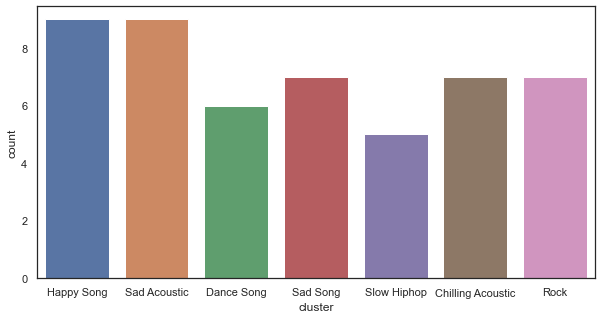

In [41]:
dfm1['cluster'].replace(0,'Chilling Acoustic',inplace=True)
dfm1['cluster'].replace(1,'Sad Song',inplace=True)
dfm1['cluster'].replace(2,'Happy Song',inplace=True)
dfm1['cluster'].replace(3,'Slow Hiphop',inplace=True)
dfm1['cluster'].replace(4,'Sad Acoustic',inplace=True)
dfm1['cluster'].replace(5,'Rock',inplace=True)
dfm1['cluster'].replace(6,'Dance Song',inplace=True)

plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=dfm1);

จะเห็นได้ว่าจาก Top Chart ของไทยนั้น สามารถ Group จากการ Cluster ได้ว่า
1. Sad Acoustic นั้นมีจำนวนที่มากที่สุด ซึ่งแปลได้ว่า คนไทยนั้นชอบฟังเพลงแนว Sad Acoustic มากกว่าแนวเพลงอื่น ๆ ซึ่งเพลงตัวอย่างก็คือเพลง ถ้าเราเจอกันอีก - Tilly Bird ซึ่งเป็นเพลงที่ฟังสบาย และเศร้า
2. Happy Song ก็มีจำนวนมากเช่นเดียวกัน ในจำนวน 9 จาก 50 เพลง ซึ่งมีเพลงตัวอย่างคือทักครับ - Lipta ซึ่งจากตัวอย่างด้านล่างแสดงให้เห็นถึงอีก Factor หนึ่งที่ส่งผลกระทบต่อการติด Top Chart คือเป็นข้อมูลที่รู้โดยทางทีงานว่าเป็นเพลงที่ดังใน Application Tiktok ซึ่งก็ส่งผลกระทบต่อความดังเช่นเดียวกัน
3. เพลงที่มีจำนวนน้อยที่สุดคือ Slow Hiphop ซึ่งมีจำนวน 5 จาก 50 เพลงที่ติด Top Chart
4. โดยทุกเพลงในหมวดหมู่ต่าง ๆ ก็ถือว่าเป็นแนวเพลงที่ค่อนข้างดังแทบทุกเพลงเนื่องจากติด Top 50 แต่แต่แนวนั้นแสดงให้เห็นถึง Possibilty ว่าเพลงแนวไหนที่มีแนวโน้มที่จะติด Top 50 มากที่สุด

In [42]:
dfm1.groupby('cluster').head(2).sort_values('cluster')

,title,danceability,energy,speechiness,acousticness,liveness,valence,danceability_Adj,energy_Adj,speechiness_Adj,acousticness_Adj,liveness_Adj,valence_Adj,cluster
8,เจ้าของที่ (My Favorite),0.631,0.822,0.0269,0.21300,0.2120,0.879,44.869565,81.794538,0.738786,24.613998,39.844761,90.157959,Chilling Acoustic
17,SuperCarCare,0.630,0.776,0.0651,0.42800,0.1620,0.944,44.695652,75.812744,20.897098,49.781685,29.064252,98.055893,Chilling Acoustic
2,That That (prod. & feat. SUGA of BTS),0.905,0.962,0.0856,0.02990,0.0272,0.906,92.521739,100.000000,31.715040,3.180493,0.000000,93.438639,Dance Song
10,FEARLESS,0.863,0.620,0.1350,0.05080,0.1290,0.432,85.217391,55.526658,57.783641,5.627027,21.949116,35.844471,Dance Song
0,ทักครับ,0.838,0.635,0.0398,0.13600,0.0709,0.960,80.869565,57.477243,7.546174,15.600454,9.422165,100.000000,Happy Song
11,DARARI,0.716,0.638,0.0392,0.48600,0.0702,0.552,59.652174,57.867360,7.229551,56.571107,9.271238,50.425273,Happy Song
9,As It Was,0.520,0.731,0.0557,0.34200,0.3110,0.662,25.565217,69.960988,15.936675,39.714610,61.190168,63.791009,Rock
13,เสแสร้ง (Pretend),0.545,0.870,0.0411,0.00273,0.4910,0.473,29.913043,88.036411,8.232190,0.000000,100.000000,40.826245,Rock
1,ถ้าเราเจอกันอีก (Until Then),0.481,0.512,0.0260,0.49600,0.1570,0.314,18.782609,41.482445,0.263852,57.741698,27.986201,21.506683,Sad Acoustic
3,With you,0.532,0.426,0.0288,0.63900,0.1340,0.137,27.652174,30.299090,1.741425,74.481136,23.027167,0.000000,Sad Acoustic


---

<a id = "13"></a>
## การใช้ Machine Learning: Classification เพื่อ Predict Genre ของเพลง
### จุดประสงค์
1. เป็นเกณณ์ในการตั้ง Genre ของเพลงต่าง ๆ จาก Songs Feature ต่าง ๆ จากเพลงทั้งโลก
2. ได้เป็น Genre ต่าง ๆ ที่อยู่ใน Top 50 ของเพลงไทย
###  ประโยชน์ของ Model
1. เป็น 1 ตัวช่วยในการตั้ง Genre ของเพลงตนเอง เพื่อให้เขากับสากลของโลก
2. หาก Model มีความ Precise สามารถใช้ในการ Predict Genre เพลงที่จะทำ เพื่อตอบ Demand ผู้ฟังได้

### ข้อมูลเพิ่มเติมมาจาก
1. เพลงที่ติด Top Chart ในช่วงปี 2000: https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset
2. เพลงที่ติด Top Chart ตั้งแต่ปี 2010 - 2019: https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year?select=top10s.csv
3. Genre ของแต่ละเพลงที่ไม่สามารถ Scrape จาก Spotify ได้: http://organizeyourmusic.playlistmachinery.com/#

In [43]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [44]:
df_2000 = pd.read_csv('https://raw.githubusercontent.com/pawitr123/ML_project_Spotify/main/Spotify-2000.csv')
df_top10s = pd.read_csv('https://raw.githubusercontent.com/pawitr123/ML_project_Spotify/main/top10s.csv',encoding='UTF-8', engine='python')
df_2000.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [45]:
df_top10s.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### จัดเตรียม Data ให้พร้อมสำหรับการสร้าง Model
#### ตัด Column ที่ไม่ใช้ในการ Predict model ออกไป

In [46]:
df_2000.drop(columns = ['Index', 'Title', 'Artist', 'Year'], inplace = True)
df_top10s.drop(columns = ['Unnamed: 0', 'title', 'artist', 'year'], inplace = True)

#### เชื่อมทั้ง 2 Data set เนื่องจาก Data นั้นแยกมาเป็น 2 อันที่มาจากแต่ละปี รวมถึงตั้งชื่อ Column ให้เหมือนกันเพื่อที่จะให้ง่ายต่อการเรียกใช้

In [47]:
df_top10s.columns = df_2000.columns
df = df_2000.append(df_top10s, ignore_index = True)

#### ในข้อมูลมีหลายจุดที่มี Data ที่มาจาก CSV ที่ยังไม่ได้แตกออกเป็นชิ้นจริง ๆ

In [48]:
attributes = df.columns[1:]
for attribute in attributes:
    temp = df[attribute]
    for instance in range(len(temp)):
        if(type(temp[instance]) == str):
            df[attribute][instance] = float(temp[instance].replace(',',''))

/var/folders/xx/xfkg31rs5xd4yfzbd0xx8vd40000gn/T/ipykernel_22531/3937406935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[attribute][instance] = float(temp[instance].replace(',',''))


#### เนื่องจากเราจะดูแค่เนื้อหาภายในเพลงที่ไม่ได้อิงกับ Popularity เพื่อใช้ในการสร้างเพลงใหม่ด้วย

In [49]:
df = df.drop(columns=['Popularity'])

In [50]:
len(df['Top Genre'].unique())

167

In [51]:
genre = (df["Top Genre"].str.strip()).str.lower()

def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
    return result.str.join('')

genre_m1 = genre.copy()
while(max((genre_m1.str.split(" ", 1)).str.len()) > 1):
    genre_m1 = genre_splitter(genre_m1)

len(genre_m1.unique())

73

#### ตัด Genre ของเพลงที่มีน้อยกว่า 20 ค่า จาก 2597 ค่าออก

In [52]:
unique = genre_m1.unique()
to_remove = [] 

for genre in unique:
    if genre_m1.value_counts()[genre] < 20:
        to_remove += [genre]
len(to_remove)

58

In [53]:
df['Top Genre'] = genre_m1
df

,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness
0,standards,157,30,53,-14,11,68,201.0,94,3
1,rock,135,79,50,-11,17,81,207.0,17,7
2,hop,168,69,66,-9,7,52,341.0,2,17
3,metal,173,96,43,-4,3,37,269.0,0,4
4,rock,106,82,58,-5,10,87,256.0,1,3
...,...,...,...,...,...,...,...,...,...,...
2592,pop,104,66,61,-7,20,16,176,1,3
2593,pop,95,79,75,-6,7,61,206,21,12
2594,pop,136,76,53,-5,9,65,260,7,34
2595,pop,114,79,60,-6,42,24,217,1,7


In [54]:
df.set_index(["Top Genre"],drop = False, inplace = True)
for name in to_remove:
    type(name)
    df.drop(index = str(name), inplace = True)

In [55]:
df["Top Genre"].value_counts()

rock         857
pop          802
standards    123
metal         93
indie         78
soul          56
cabaret       51
hop           43
wave          42
invasion      36
europop       27
mellow        26
dance         22
band          21
folk          20
Name: Top Genre, dtype: int64

<AxesSubplot:xlabel='Top Genre', ylabel='count'>

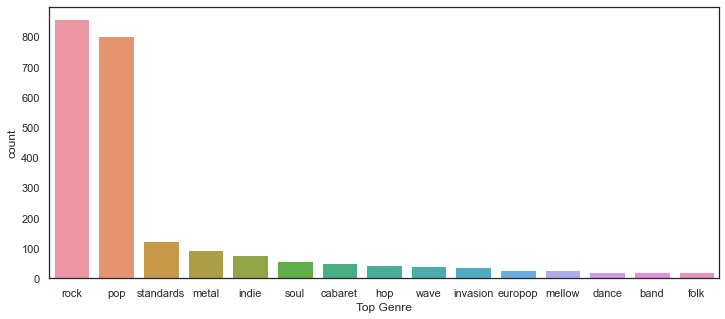

In [56]:
plt.figure(figsize=(12, 5))
sns.countplot(x = "Top Genre", data = df,
              order = df["Top Genre"].value_counts().index)

สามารถเพิ่มข้อสังเกตได้ว่าเพลงส่วนใหญ่นั้นจะเป็นเพลงที่เป็นเพลง Rock หรือเพลง Pop ที่จะสามารถเข้าสู่ตลาดได้มากกว่าในเพลงที่ติด Top Chart ของโลก
- โดย เพลง Rock มีถึง 857 เพลง ส่วนเพลง Pop มีถึง 802 เพลง
- แสดงให้เห็นว่าเพลง Rock และเพลง Pop นั้นสูงมาก ๆ แสดงได้ว่าเพลงในสมัยปี 2000 - 2019 นั้น เพลง Rock กับเพลง Pop สูงมาก ๆ เมื่อเทียบกับข้อมูลอื่น สามารถกล่าวได้ว่าเพลงไทยในสมัยนั้นของเราก็มีเพลง Rock กับ Pop ที่ดัง จาก Globalization และ technology ต่าง ๆ

<a id = "14"></a>
### เลือก Model ที่เหมาะที่สุดสำหรับ Classification แบบ Supervised
แบ่ง Train Test set เพื่อใช้ในการดูความแม่นของ Model นี้

In [57]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 10)

X_train = train_set.values[:,1:]
y_train = train_set.values[:,0]


X_test = test_set.values[:,1:]
y_test = test_set.values[:,0]

In [58]:
y_test

array(['rock', 'wave', 'pop', 'cabaret', 'rock', 'rock', 'pop', 'pop',
       'rock', 'metal', 'indie', 'wave', 'pop', 'rock', 'pop', 'pop',
       'pop', 'pop', 'mellow', 'standards', 'rock', 'metal', 'pop', 'pop',
       'pop', 'pop', 'rock', 'pop', 'rock', 'indie', 'invasion', 'rock',
       'rock', 'pop', 'rock', 'rock', 'pop', 'rock', 'pop', 'pop', 'rock',
       'invasion', 'rock', 'standards', 'pop', 'europop', 'rock', 'rock',
       'rock', 'invasion', 'rock', 'pop', 'rock', 'invasion', 'standards',
       'rock', 'pop', 'pop', 'rock', 'pop', 'europop', 'rock', 'metal',
       'indie', 'indie', 'soul', 'pop', 'rock', 'pop', 'pop', 'pop',
       'pop', 'folk', 'rock', 'rock', 'europop', 'rock', 'rock', 'pop',
       'pop', 'rock', 'pop', 'soul', 'rock', 'rock', 'band', 'band',
       'pop', 'metal', 'rock', 'cabaret', 'pop', 'rock', 'rock', 'pop',
       'folk', 'rock', 'rock', 'pop', 'standards', 'metal', 'pop', 'rock',
       'pop', 'pop', 'rock', 'cabaret', 'pop', 'folk', 'in

In [59]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train)

# Standard Scaler
X_train_ST = standard_scaler.transform(X_train)
X_test_ST = standard_scaler.transform(X_test)

In [60]:
unique = np.unique(y_train)

In [61]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
# 1 hot encoding
y_test_1hot = label_binarize(y_test, classes = unique)
y_train_1hot = label_binarize(y_train, classes = unique)

# labelling
y_test_label = LabelEncoder()

In [62]:
show_data = pd.DataFrame(y_train_1hot)
show_data.columns=['rock', 'wave', 'pop', 'cabaret', 'metal', 'indie', 'mellow',
       'standards', 'invasion', 'europop', 'soul', 'folk', 'band', 'hop',
       'dance']
show_data #ทำข้อมูลเป็น binary สำหรับ Random forest

,rock,wave,pop,cabaret,metal,indie,mellow,standards,invasion,europop,soul,folk,band,hop,dance
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1833,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1834,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1835,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

models = []
models += [['Naive Bayes', GaussianNB()]]
models += [['SGD', OneVsOneClassifier(SGDClassifier())]]
models += [['Logistic', LogisticRegression(multi_class = 'ovr')]]
rand_forest = RandomForestClassifier(random_state = 10, min_samples_split = 5)

>ศึกษาวิธีการทำ Multiclass Classification: https://www.datarobot.com/blog/multiclass-classification-in-machine-learning/
>> OvR, OvO: https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a


#### ลองดูหลาย ๆ Model เพื่อใช้ในการ Predict ว่า Model ไหนให้ค่าที่มากที่สุด

In [64]:
result_ST =[]
kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

# Random Forest has to be done separately since it takes in one hot encoded labels instead
RF_cross_val_score = cross_val_score(rand_forest, X_train_ST, y_train_1hot, cv = 10, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', RF_cross_val_score.mean(), RF_cross_val_score.std()))

for name, model in models:
    cv_score = cross_val_score(model, X_train_ST, y_train, cv = kfold, scoring = 'accuracy')
    result_ST.append(cv_score)
    print('%s: %f (%f)' % (name,cv_score.mean(), cv_score.std()))

Random Forest: 0.373393 (0.034474)
Naive Bayes: 0.426218 (0.025040)
SGD: 0.522627 (0.028507)
Logistic: 0.557950 (0.028387)


In [65]:
from sklearn.metrics import precision_score, recall_score

result_precision_recall = []

# same reasoning as before for Random Forest
y_temp_randforest = cross_val_predict(rand_forest, X_train_ST, y_train_1hot, cv = 10)
result_precision_recall += [['Random Forest', precision_score(y_train_1hot, y_temp_randforest, average = "micro"), 
                            recall_score(y_train_1hot, y_temp_randforest, average = "micro")]]

print('%s| %s: %f, %s (%f)' % ('Random Forest', 'Precision Score: ', precision_score(y_train_1hot, y_temp_randforest, average = "micro"), 
                           'Recall Score: ', recall_score(y_train_1hot, y_temp_randforest, average = "micro")))

for name, model in models:
    y_pred = cross_val_predict(model, X_train_ST, y_train, cv = kfold)
    precision = precision_score(y_train, y_pred, average = "micro")
    recall = recall_score(y_train, y_pred, average = "micro")
    # storing the precision and recall values
    result_precision_recall += [[name , precision, recall]]
    print('%s| %s: %f, %s (%f)' % (name, 'Precision Score: ', precision, 'Recall Score: ', recall))

Random Forest| Precision Score: : 0.703590, Recall Score:  (0.373435)
Naive Bayes| Precision Score: : 0.426238, Recall Score:  (0.426238)
SGD| Precision Score: : 0.511704, Recall Score:  (0.511704)
Logistic| Precision Score: : 0.557975, Recall Score:  (0.557975)


In [66]:
from sklearn.metrics import f1_score

for name, precision, recall in result_precision_recall:
    print("%s: %f" % (name, 2 * (precision * recall) / (precision + recall)))

Random Forest: 0.487909
Naive Bayes: 0.426238
SGD: 0.511704
Logistic: 0.557975


In [67]:
model_method1 = LogisticRegression(multi_class = 'ovr').fit(X_train_ST, y_train)

predictions_method1 = model_method1.predict(X_test_ST)

In [68]:
cols=['Beats Per Minute (BPM)', 'Energy', 'Danceability',
       'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)',
       'Acousticness', 'Speechiness']
colsy=['Top Genre']
dfxtest = pd.DataFrame(data=X_test_ST, columns=cols)
dfytest = pd.DataFrame(data=y_test,columns=colsy)
dfypredict = pd.DataFrame(data=predictions_method1,columns=['predicted'])

df_original = dfxtest.join(dfytest)
df_predicted = df_original.join(dfypredict)

#ค่าที่ไม่เท่าสิ่งที่ Predict
df_predicted.loc[df_predicted['Top Genre'] != df_predicted['predicted']]

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Top Genre,predicted
0,-0.962191,1.016477,-0.235365,1.104671,-0.540124,-0.190819,-0.453247,-0.913764,-0.493989,rock,pop
1,0.992601,-0.835191,0.025018,0.325577,-0.476558,-1.224478,0.655615,1.692124,-0.682064,wave,pop
3,-0.435901,0.599851,0.415591,0.585275,-0.476558,1.338997,-0.324853,0.549817,-0.493989,cabaret,rock
8,-0.736638,0.044351,0.350496,0.844973,-0.540124,-0.728322,-0.149769,0.621211,-0.493989,rock,pop
9,0.917416,-1.298107,0.545783,-0.713215,-0.476558,0.181298,-0.033047,2.334671,-0.493989,metal,pop
...,...,...,...,...,...,...,...,...,...,...,...
454,-1.338113,-0.650024,-0.365556,0.065879,0.095540,-0.149473,-0.745053,0.799696,0.634456,rock,pop
456,-0.210348,0.414685,0.741069,0.065879,-0.540124,-0.149473,-0.068064,0.585514,-0.117841,rock,pop
457,0.503903,-0.881482,-1.081608,-0.713215,-0.158726,-0.438897,-0.033047,0.621211,-0.493989,pop,rock
458,0.015205,1.433102,-0.300460,1.364369,-0.285859,-0.108126,0.118692,-0.913764,-0.305915,metal,pop


In [69]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score

In [70]:
cm=confusion_matrix(y_test, predictions_method1)
cm

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   8,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   2,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,   9,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   3,   0,
          2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   2,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   6,  10,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 129,  41,   0,
       

/Users/yanin/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


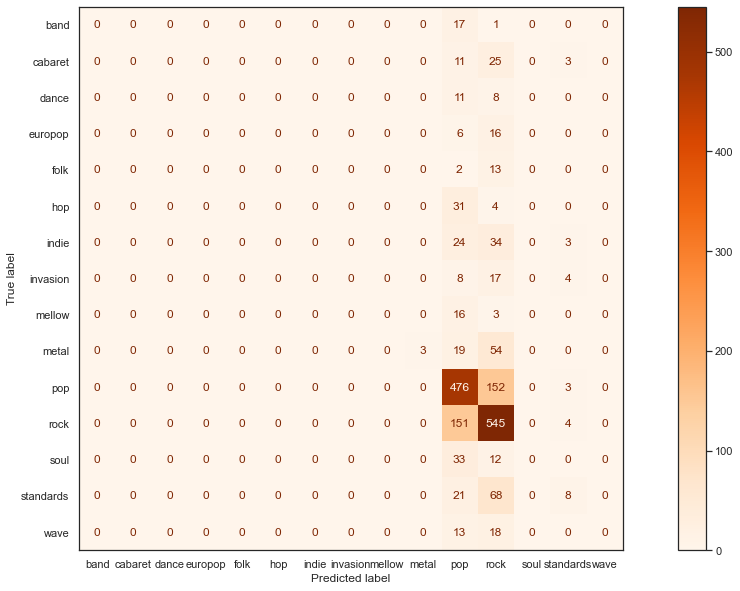

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
plot_confusion_matrix(model_method1, X_train_ST, y_train, cmap='Oranges',ax=ax)

In [72]:
print(f1_score(y_test, predictions_method1, labels = unique, average = 'micro'))

0.5391304347826087


#### ลองเอา Model มา Train กับ Data ที่เป็นของไทย

In [73]:
df_with_cat=pd.read_csv('https://raw.githubusercontent.com/pawitr123/ML_project_Spotify/main/Top_50_with_genre_10_05_2022.csv')
dfwc = df_with_cat.drop(columns=['title','artist', 'year', 'added', 'pop'])
dfwc.columns = ['Top Genre','Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness']
dfwc.head()

,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness
0,pop,174,73,52,-5,31,66,167,34,6
1,canadian pop,154,74,60,-6,42,44,153,19,5
2,australian hip hop,170,76,59,-5,10,48,142,4,5
3,k-pop,150,43,53,-6,13,14,202,64,3
4,k-pop,118,71,70,-4,33,54,177,0,4


#### แปลงข้อมูลให้มีเนื้อหาเหมือนกับใน Model ข้างต้น

In [74]:
dfwc["Top Genre"] = dfwc["Top Genre"].replace(['canadian pop','k-pop','australian pop','thai pop','thai indie pop','t-pop girl group','thai pop rap','thai viral pop'],'pop')
dfwc["Top Genre"] = dfwc["Top Genre"].replace(['thai indie rock','alt z'],'rock')
dfwc["Top Genre"] = dfwc["Top Genre"].replace(['indonesian r&b','australian hip hop','chill r&b', 'canadian contemporary r&b',
       'asian american hip hop', 'thai hip hop', 'thai trap'],'hop')

#### สร้างตัว Test ขึ้นมาจากข้อมูล Top 50 ที่ติด Chart ในไทย

In [75]:
X_dfwc = dfwc[['Beats Per Minute (BPM)', 'Energy', 'Danceability',
       'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)',
       'Acousticness', 'Speechiness']]
y_dfwc = dfwc['Top Genre']
y_dfwclist=y_dfwc.tolist()

In [76]:
X_dfwc_ST = standard_scaler.transform(X_dfwc)
X_dfwc_ST[0]

/Users/yanin/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([ 2.04518087,  0.50726808, -0.23536474,  0.84497286,  0.79477067,
        0.63610847, -1.01351482,  0.29993719,  0.07023351])

In [77]:
predictions_method2 = model_method1.predict(X_dfwc_ST)

dfwcpredict = pd.DataFrame(data=predictions_method2,columns=['predicted'])

In [78]:
thaidata = dfwc[['Beats Per Minute (BPM)', 'Energy', 'Danceability',
       'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)',
       'Acousticness', 'Speechiness','Top Genre']]

df_thai_predicted = thaidata.join(dfwcpredict)
df_thai_predicted.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Top Genre,predicted
0,174,73,52,-5,31,66,167,34,6,pop,pop
1,154,74,60,-6,42,44,153,19,5,pop,pop
2,170,76,59,-5,10,48,142,4,5,hop,pop
3,150,43,53,-6,13,14,202,64,3,pop,pop
4,118,71,70,-4,33,54,177,0,4,pop,pop


<AxesSubplot:xlabel='predicted', ylabel='count'>

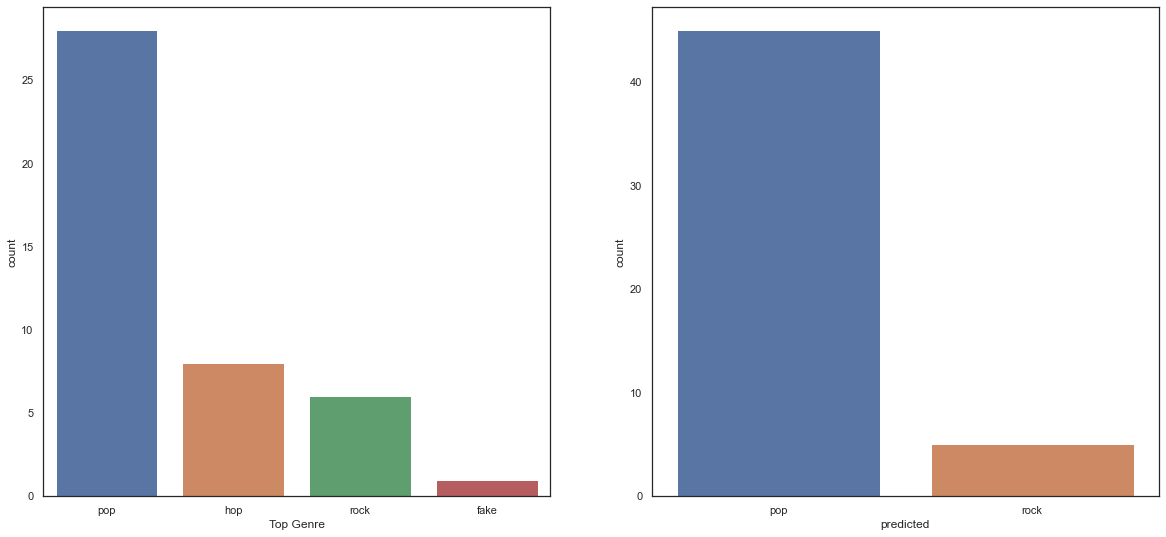

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
sns.countplot(x = "Top Genre", data = df_thai_predicted,
              order = df_thai_predicted["Top Genre"].value_counts().index, ax=ax[0])
sns.countplot(x = "predicted", data = df_thai_predicted,
              order = df_thai_predicted["predicted"].value_counts().index, ax=ax[1])

จะเห็นได้ว่าสิ่งที่ Predict แทบทุกอันนั้นออกมาเป็น Pop และมีบางส่วนที่เป็น rock ซึ่งไม่ได้ตรงกับข้อมูลจริง ซึ่งจะนำไปดูความแม่นต่อ

<a id = "15"></a>
### ความแม่นยำของ model

In [80]:
# Accuracy Score
len(df_thai_predicted.loc[df_thai_predicted['Top Genre'] == df_thai_predicted['predicted']])/len(df_thai_predicted)

0.52

$$Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$

In [81]:
metrics.accuracy_score(y_dfwclist, predictions_method2)

0.52

In [82]:
print(f1_score(y_dfwclist, predictions_method2, labels = unique, average = 'micro'))

0.5652173913043478


In [83]:
metrics.confusion_matrix(y_dfwclist, predictions_method2)

array([[ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  6,  1],
       [ 0,  0,  0, 25,  3],
       [ 0,  0,  0,  5,  1]])

จากการนำ Model มา Predict ข้อมูล Genre ที่เป็นของไทย
- จาก Confusion Matrix แสดงให้เห็นว่ามี Pop ที่ทายถูก 25 ครั้ง และ Rock ที่ทายถูก 1 ครั้ง จากทั้งหมด 50 แถว
- ได้ Accuracy Score ที่ 0.52 และ f1 score ที่ 0.56 

ข้อสังเกตที่พบเห็น
1. Accuracy Score และ F1 Score มีค่าที่ยังต่ำ และอาจจะยังไม่สามารถใช้ได้ คาดว่ามีเหตุผลดังนี้
- เนื่องจากข้อมูลเพลงของไทยที่แปลง อาจไม่ได้ตรงกับ genre หลักของ โลก หรือยังไม่เป็นสากล จะเห็นได้ว่าเพลงต่าง ๆ ของไทยนั้นมี Genre ที่คลุมเครือ และไม่ได้ตรงกับของต่างประเทศ เช่น Thai Indie Rock บางเพลง อาจจะเช้ากับการเป็นเพลง Rock และบางเพลงอาจเข้ากับเพลง Indie มากกว่า และในบางครั้งมี Audio Features ที่เหมือนกับเพลง Pop ด้วยซ้ำ
- ข้อมูลที่เอามาสร้าง Model ไม่ได้ครบถ้วนไปถึงเพลงที่ไม่ได้ดังในช่วงเวลานั้น ๆ กล่าวคือ ข้อมูลที่เป็น Top ของปี 2000 - 2019 นั้นอาจไม่ได้ Fit กับ Top Chart ในปีปัจจุบัน ซึ่งมีผลมาจาก Trend ด้าน Music Industry ที่เปลี่ยน ทำให้เพลงแนวอื่น ๆ ขึ้นมาเป็น Top Chart แทน ซึ่งการที่มีแนวเพลงไม่กี่แนวที่ดังทำให้เห็นถึงยอด Pop กับ Rock ที่สูงมาก ๆ กว่า 800 เพลงในแต่ละ Genre ซึ่งถ้าหากเทียบกับเพลง Folk ที่มีแค่ 20 เพลงนั้น ทำให้สิ่งที่ Predict แล้วได้ Folk นั้นถือว่ายากมาก ๆ
- ข้อมูลไม่เพียงพอต่อการสร้าง Model ที่แม่นมากกว่านี้ กล่าวคือ ข้อมูลดังกล่าวนั้น ถึงแม้จะมีถึง 2597 เพลง หรือที่เราดึงมาสร้าง Model ประมาณ 2000 เพลง แต่ว่าในความเป็นจริงนั้น เพลงใน Spotify นั้นมีมากกว่า 1 ล้านเพลง ซึ่งถ้าหากว่ามีข้อมูลตรงนั้น คาดเดาว่าจำทำให้ Classification เห็นความต่างได้ชัดมากขึ้น แล้วทำให้ Model นั้น Predict ได้แม่นขึ้น ซึ่งข้อมูล 1 ล้านเพลงนั้นสามารถหาได้จากที่นี่ โดยต้อง Email ไปหาทางทีมงาน และแจ้งว่าเพื่อทำ Research: https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge

---

<a id = "16"></a>
## การใช้ Machine Learning: linearRegression เพื่อ Predict ค่า popularity ของเพลง
### จุดประสงค์
1. ดูความสัมพันธ์ของ arrtists popularity กับ track popularity 
2. เพื่อให้ทราบว่าเพลง 1 เพลง จะมี attributes อะไรบ้างที่ช่วยให้เพลงนั้นมีความ popular มากขึ้น
3. predict ค่าความ popular จาก attributes

### ประโยชน์
1. เพื่อเป็นประโยชน์ต่อผู้ที่ต้องการจะออกเพลงใหม่ ดูเพลงที่มีชื่อเสียงเกิดจากปัจจัยใดบ้าง

### ข้อมูลเพิ่มเติม:
1. คำอธิบายที่มาของค่า popularity ที่คำนวนมาจากความนิยมเมื่อเทียบกับคนทั่วโลก https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/

In [84]:
df=pd.read_csv('https://raw.githubusercontent.com/pawitr123/454_eda_data/main/Spotify_10_05_2022.csv')
df.head()

,id,title,first_artist,artist_genre,artist_popularity,all_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity
0,70DE8f3cq3auql4JMrF0Qg,ทักครับ,Lipta,['thai pop'],53,"['Lipta', 'GUYGEEGEE']",0.838,0.635,1,-5.929,1,0.0398,0.1360,0.0,0.0709,0.960,97.051,191500,4,60
1,3crZQarcOagdupRZNzRGWe,ถ้าเราเจอกันอีก (Until Then),Tilly Birds,"['thai indie rock', 'thai pop']",60,['Tilly Birds'],0.481,0.512,3,-6.365,1,0.0260,0.4960,0.0,0.1570,0.314,75.876,288250,4,65
2,5oH4DQAuu1J1800RzUsBWa,That That (prod. & feat. SUGA of BTS),PSY,"['k-pop', 'k-rap', 'korean old school hip hop']",73,"['PSY', 'SUGA']",0.905,0.962,4,-3.197,1,0.0856,0.0299,0.0,0.0272,0.906,129.969,174647,4,83
3,2gzhQaCTeNgxpeB2TPllyY,With you,Jimin,[],74,"['Jimin', 'HA SUNG WOON']",0.532,0.426,3,-6.117,1,0.0288,0.6390,0.0,0.1340,0.137,149.898,201905,3,87
4,2m6Ko3CY1qXNNja8AlugNc,Angel Baby,Troye Sivan,"['australian pop', 'dance pop', 'electropop', ...",81,['Troye Sivan'],0.559,0.559,11,-6.425,1,0.0358,0.0145,0.0,0.1380,0.338,72.498,220780,4,79


### ทำการ drop column ที่ไม่ใช้ในการคำนวนออก เพื่อให้เหลือแต่ column ที่เป็นตัวเลขเท่านั้น

In [85]:
df.drop(['id', 'title', 'first_artist', 'artist_genre', 'all_artists', 'time_signature'], inplace=True, axis=1)
df.head()

,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity
0,53,0.838,0.635,1,-5.929,1,0.0398,0.1360,0.0,0.0709,0.960,97.051,191500,60
1,60,0.481,0.512,3,-6.365,1,0.0260,0.4960,0.0,0.1570,0.314,75.876,288250,65
2,73,0.905,0.962,4,-3.197,1,0.0856,0.0299,0.0,0.0272,0.906,129.969,174647,83
3,74,0.532,0.426,3,-6.117,1,0.0288,0.6390,0.0,0.1340,0.137,149.898,201905,87
4,81,0.559,0.559,11,-6.425,1,0.0358,0.0145,0.0,0.1380,0.338,72.498,220780,79


<a id = "17"></a>
### ดูความสัมพันธ์ระหว่างค่า attributes กับ track_popularity

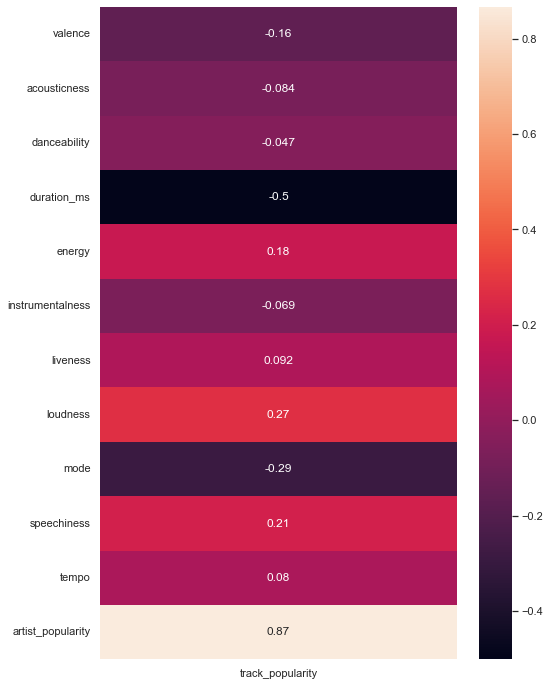

In [86]:
dd = df.corr().loc[['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'artist_popularity'],['track_popularity']]

plt.subplots(figsize=(8, 12))
sns.heatmap(dd,annot=True)
sns.set(font_scale = 1)

ข้อเท็จจริงที่ได้:
- artist_popularity และ track_popularity มีความสัมพันธ์ strong positive correlation ต่อกันมาก ซึ่งถือว่าเป็นเรื่องปกติ เนื่องจากหากศิลปินท่านใดมีชื่อเสียงมาก เพลงของเขาย่อมมีชื่อเสียงตาม เพราะมีฐานแฟนคลับ และคนรู้จักมากเป็นทุนเดิมอยู่แล้ว
- duration_ms และ track_popularity มีความสัมพันธ์ strong negative correlation ต่อกันมาก ยิ่งเพลงในความยาวน้อย ยิ่งได้รับความนิยมมากขึ้น เนื่องจากคนมักจะนิยมฟังเพลงซ้ำๆ และเมื่อเพลงไหนมีความยาวน้อย คนจะสามารถฟังซ้ำได้อีกหลายรอบ
- สิ่งที่ส่งผลต่อ track_popular ของเพลงที่มีลักษณะไปในทางเดียวกันคือค่า energy, loudness, และ speechiness

<a id = "18"></a>
### Popularity distribution

/Users/yanin/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


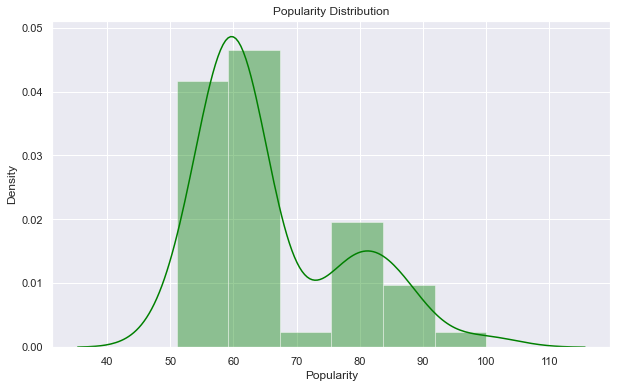

In [87]:
sns.distplot(df['track_popularity'],color='green').set_title('Popularity Distribution')
plt.xlabel('Popularity')
rcParams['figure.figsize'] = 8,8
sns.set(font_scale = 2)
sns.set(rc={'axes.facecolor':'#D3D3D3'})

จากกราฟจะเห็นได้ว่าการกระจายตัวของค่า popularity ของเพลงไทยส่วนใหญ่จะอยู่ที่ 50-70 เป็นหลัก โดยช่วง 70-100 ก็จะมีบ้างแต่จะไม่มากเท่าระดับแรก แสดงให้เห็นว่าเพลงไทยเมื่อเทียบกับความนิยมของคนทั่วโลกยังไม่ได้มีจังหวะ หรือดนตรีที่เป็นที่เข้าถึงคนทั่วโลกได้โดยทั่วกันขนาดนั้น

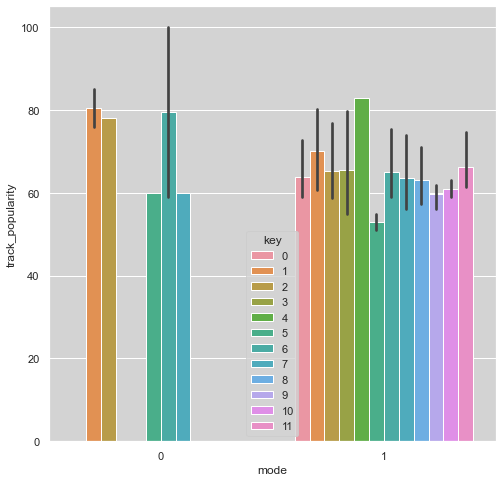

In [88]:
sns.barplot(x = 'mode', y = 'track_popularity', hue = 'key', data = df);

ทำให้เห็นว่าเพลงที่ติด top 50 - Thailand ส่วนมากอยู่ที่ mode 1 ซึ่งคือ major เป็นหลัก โดย key ของเพลงที่ติด top 50 - Thailand จะเป็น key ที่ 4(E) ซึ่งเมื่อรวมกับ mode ที่ 1 จะกลายเป็น E major  
คำอธิบายเพิ่มเติม: key 0(C), 1(C#), so on...

<a id = "19"></a>
### ทำการ Predict โดยใช้ LinarRegression
<a id = "20"></a>
### a.) Predict track popularity จาก attributes ทั้งหมด

In [89]:
df.head()

,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity
0,53,0.838,0.635,1,-5.929,1,0.0398,0.1360,0.0,0.0709,0.960,97.051,191500,60
1,60,0.481,0.512,3,-6.365,1,0.0260,0.4960,0.0,0.1570,0.314,75.876,288250,65
2,73,0.905,0.962,4,-3.197,1,0.0856,0.0299,0.0,0.0272,0.906,129.969,174647,83
3,74,0.532,0.426,3,-6.117,1,0.0288,0.6390,0.0,0.1340,0.137,149.898,201905,87
4,81,0.559,0.559,11,-6.425,1,0.0358,0.0145,0.0,0.1380,0.338,72.498,220780,79


In [90]:
x=df.drop(columns=['track_popularity', 'key'])
y=df['track_popularity']

In [91]:
import sklearn
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=9)
model=LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)
print(f'model train score = {model.score(x_train, y_train)}')
print(f'model test score = {model.score(x_test, y_test)}')

model train score = 0.8840475002328004
model test score = 0.6280264570640839


model นี้มีความ overfitting กล่าวคือค่าความแม่นยำตอน train ได้ 0.88 แต่ตอน test ลดลงเหลือความแม่นยำที่ 0.62 ทำให้ไม่สามารถ predict track_population ได้แม่นยำเท่าตอน train แต่ก็ไม่ได้คำนวนพลาดจนไม่สามารถดูแนวโน้มได้

### Predict ค่า track_popularity

In [92]:
y_pred=model.predict(x_test)

dt=pd.concat([y_test.reset_index(), pd.Series(y_pred, name='predicted')], axis='columns')
dt

,index,track_popularity,predicted
0,21,59,58.329127
1,37,88,93.502215
2,2,83,76.703771
3,14,61,58.415897
4,44,55,60.722461
5,7,63,57.219810
6,15,62,50.385641
7,20,60,47.520905
8,32,59,65.153030
9,25,79,84.274660


<a id = "21"></a>
### b.) Predict track popularity จากบาง attributes  
โดยเลือก attributes ที่มีความสัมพันธ์กับ track popularity มากที่สุด โดยวัดจากค่า strong correlation >= 0.21 ซึ่งคือ artist_popularity, loudness, speechiness, mode และ duration_ms 
<a id = "30"></a>
### ดูการกระจายตัวของ attributes ที่เลือกมา

<AxesSubplot:xlabel='artist_popularity', ylabel='track_popularity'>

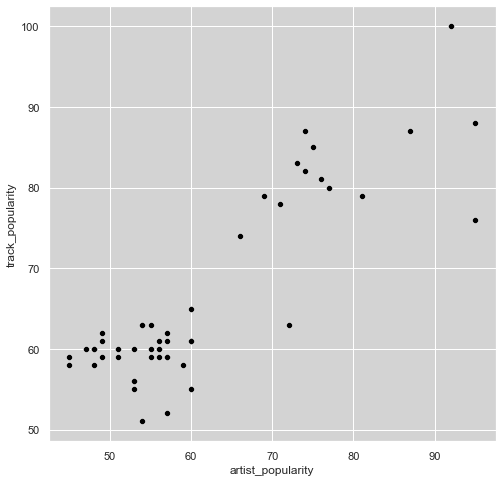

In [93]:
sns.scatterplot(x = 'artist_popularity', y = 'track_popularity', data = df, color = 'black')

<AxesSubplot:xlabel='loudness', ylabel='track_popularity'>

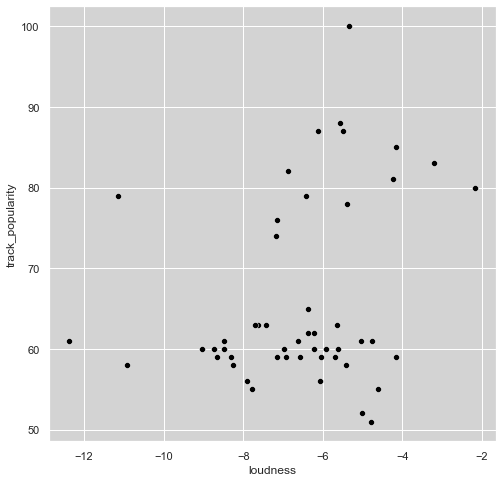

In [94]:
sns.scatterplot(x = 'loudness', y = 'track_popularity', data = df, color = 'black')

<AxesSubplot:xlabel='speechiness', ylabel='track_popularity'>

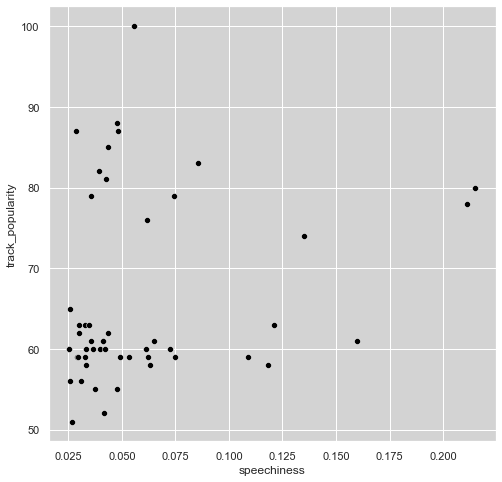

In [95]:
sns.scatterplot(x = 'speechiness', y = 'track_popularity', data = df, color = 'black')

<AxesSubplot:xlabel='mode', ylabel='track_popularity'>

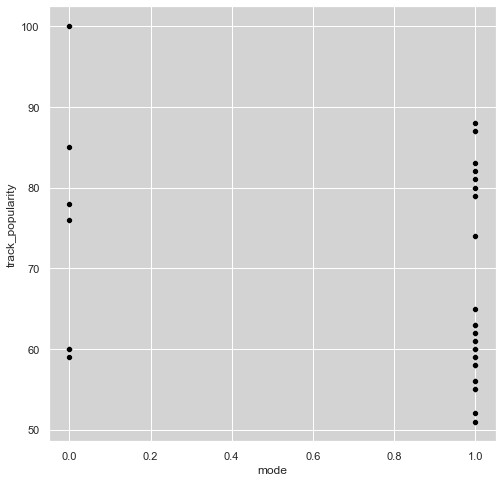

In [96]:
sns.scatterplot(x = 'mode', y = 'track_popularity', data = df, color = 'black')

<AxesSubplot:xlabel='duration_ms', ylabel='track_popularity'>

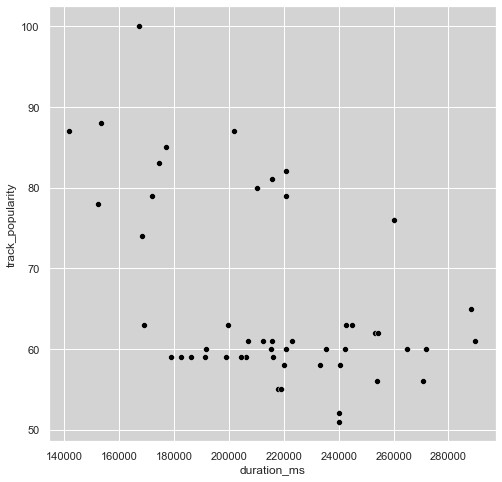

In [97]:
sns.scatterplot(x = 'duration_ms', y = 'track_popularity', data = df, color = 'black')

### Predict ค่า track_popularity จากค่าที่เลือกมา

In [98]:
x2=df.drop(columns=['track_popularity','danceability','valence','tempo','energy', 'instrumentalness','acousticness', 'liveness', 'key'])
y2=df[ 'track_popularity']

In [99]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, 
                                                    test_size=0.3,
                                                    random_state=9)
model=LinearRegression()
model.fit(x2_train, y2_train)
model.score(x2_test, y2_test)
print(f'model train score = {model.score(x2_train, y2_train)}')
print(f'model test score = {model.score(x2_test, y2_test)}')

model train score = 0.7822464865437735
model test score = 0.7091076525019528


model นี้มีความ overfitting เพียงเล็กน้อย กล่าวคือค่าความแม่นยำตอน train ได้ 0.78 แต่ตอน test ลดลงเหลือความแม่นยำที่ 0.71 ทำให้ไม่สามารถ predict track_population ได้แม่นยำเท่าตอน train แต่ก็ไม่ได้แตกต่างมากขนาดที่คำนวนพลาดจนไม่สามารถดูแนวโน้มได้

### Predict ค่า track_popularity

In [100]:
y_pred2=model.predict(x2_test)
dt2=pd.concat([y2_test.reset_index(), pd.Series(y_pred2, name='predicted')], axis='columns')
dt2

,index,track_popularity,predicted
0,21,59,54.896675
1,37,88,90.394827
2,2,83,73.693145
3,14,61,65.011655
4,44,55,59.442240
5,7,63,58.917128
6,15,62,54.286588
7,20,60,52.643731
8,32,59,62.027596
9,25,79,75.271361


<a id = "22"></a>
### Conclusion
จากการ predict ค่า track_population จาก attributes ทุกตัว และจาก attributes บางตัว จะเห็นได้ว่า การ predict ที่ใช้ attributes ทั้งหทดได้ค่าความแม่นยำอยู่ที่ 0.63 แต่การ predict ที่ใช้ attributes บางตัว คือ artist_popularity, energy, loudness, mode และ speechiness ได้ความแม่นยำอยู่ที่ 0.71 ซึ่งกล่าวคือความมีชื่อเสียงของเพลงไม่ได้ขึ้นอยู่กับ attribute ทุกตัว ดังนั้นผู้แต่งเพลงจึงสามารถเลือกศึกษา trend ของ attribute บางตัวเพื่อนำไปแต่งเพลงได้
- เนื่องจากโมเดลมีค่าความแม่นยำอยู่ในระดับที่ไม่มากคืออยู่ที่ 0.71 ทำให้ทราบได้อย่างหนึ่งคือ ค่า popularity ของเพลงๆหนึ่งนั้น ขึ้นอยู่กับหลายปัจจัย การนำเอาค่า attribute ต่างๆมา predict นั้น อาจทำให้ได้ความแม่นยำได้เพียงในเรื่องการใช้ mood properties context ของเพลงเท่านั้น ซึ่งสิ่งเหล่านี้เป็นปัจจัยภายใน แต่ความมีชื่อเสียงของเพลงไม่ได้ขึ้นอยู่แต่เพียงเท่านั้น ยังต้องมีปัจจัยภายนอกต่างๆในการทำให้ประสบความสำเร็จอีกด้วย ซึ่งปัจจัยภายนอกสามารถมีได้หลายปัจจัย เช่น ขึ้นอยู่กับแต่ละประเทศ ลักษณะประชากร อุปกรณ์ที่ทำการ stream เพลง การทำการตลาดของเพลง และอื่นๆอีกมากมาย และจากข้อมูลจะเห็นได้ว่าชื่อเสียงศิลปินถือว่ามีความเกี่ยวข้องกับความมีชื่อเสียงของเพลงเป็นส่วนใหญ่ เนื่องจากหากศิลปินผู้ทำเพลงมีชื่อเสียง ก็จะทำให้เพลงได้รับความนิยมยมากโดยไม่ต้องลงแรงมากมายเพราะมีฐานแฟนคลับอยู่แล้ว 


- เนื่องจากเป็นการวัด popularity ของคนทั้งโลก ดังนั้น การ predict นี้จึงเป็นการ predict เพลง top 50 - thailand กับ popularity ของคนทั่วโลก จึงทำให้ความแม่นยำของ model มีค่าเพียง 0.70 เนื่องจากในเพลง top 50 - thailand มีเพลงที่มาจากต่างประเทศซึ่งมีค่า popularity สูงกว่าเพลงไทยอยู่แล้ว ในขณะที่เพลงไทยบางเพลงมีลักษณะ mood ต่างๆคล้ายกับเพลงต่างประเทศที่มีค่า popularity สูง แต่เพลงไทยกลับไม่ได้มีค่า popularity สูงตามไปด้วย จึงสรุปได้ว่า หากต้องการจะออกเพลงๆหนึ่ง หากต้องการจะทำเพลงให้เข้ากับช่วงยุคสมัย สามารถดู trend ความชอบของคนทั่วโลกได้จากการดู mood properties และ context แต่การทำสิ่งเหล่านี้ไม่สามารถ การันตรีได้ว่าเพลงจะออกมมาโด่งดังเช่นเดียวกับเพลงที่นำมาวิเคราะห์ เพราะยังต้องอาศัยปัจจัยภายนอกควบคู่เข้าไปด้วย

<a id = "23"></a>
## Predict ยอด streams ของไทย
เนื่องจากเป็นข้อมูล popularity ของทั่วโลกจึงได้หาข้อมูลการสตรีมเพลงของไทยใน 1 สัปดาห์มาเพิ่มเพื่อดูแนวโน้มการ stream เพลง 

จุดประสงค์
1. attributes เป็นปัจจัยหลักที่ส่งผลต่อยอด stream ในไทยหรือไม่
2. เนื่องจาก track_popularity วัดมาจากของคนทั่วโลก จึงอยากทราบว่าพฤติกรรมการฟังเพลงของคนทั่วโลกสอดคล้องกับการฟังเพลงของคนไทยหรือไม่  

ข้อมูลที่ใช้เพิ่มเติม:
1. ยอด stream เพลงรายสัปดาห์ของอาทิตย์ที่ 5 พฤษภาคม 2565
   - https://charts.spotify.com/home
   - https://raw.githubusercontent.com/pawitr123/ML_project_Spotify/main/th_weekly.csv

In [101]:
spotify = pd.read_csv('https://raw.githubusercontent.com/pawitr123/454_eda_data/main/Spotify_10_05_2022.csv')

weekly=pd.read_csv('https://raw.githubusercontent.com/pawitr123/ML_project_Spotify/main/th_weekly.csv')
weekly.rename(columns={'track_name':'title'}, inplace=True)
weekly.drop(['rank', 'uri', 'source', 'artist_names', 'previous_rank'], inplace=True, axis=1) 
weekly.head()

,title,peak_rank,weeks_on_chart,streams
0,With you,1,2,528364
1,That That (prod. & feat. SUGA of BTS),2,1,525452
2,ทักครับ,3,10,501548
3,ถ้าเราเจอกันอีก (Until Then),1,23,400508
4,Angel Baby,3,34,380781


### รวมยอด stream เพลงเข้ากับข้อมูลเดิม

In [102]:
stream = pd.merge(spotify, weekly, on='title', how='inner')
stream.head()

,id,title,first_artist,artist_genre,artist_popularity,all_artists,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,peak_rank,weeks_on_chart,streams
0,70DE8f3cq3auql4JMrF0Qg,ทักครับ,Lipta,['thai pop'],53,"['Lipta', 'GUYGEEGEE']",0.838,0.635,1,-5.929,...,0.0,0.0709,0.960,97.051,191500,4,60,3,10,501548
1,3crZQarcOagdupRZNzRGWe,ถ้าเราเจอกันอีก (Until Then),Tilly Birds,"['thai indie rock', 'thai pop']",60,['Tilly Birds'],0.481,0.512,3,-6.365,...,0.0,0.1570,0.314,75.876,288250,4,65,1,23,400508
2,5oH4DQAuu1J1800RzUsBWa,That That (prod. & feat. SUGA of BTS),PSY,"['k-pop', 'k-rap', 'korean old school hip hop']",73,"['PSY', 'SUGA']",0.905,0.962,4,-3.197,...,0.0,0.0272,0.906,129.969,174647,4,83,2,1,525452
3,2gzhQaCTeNgxpeB2TPllyY,With you,Jimin,[],74,"['Jimin', 'HA SUNG WOON']",0.532,0.426,3,-6.117,...,0.0,0.1340,0.137,149.898,201905,3,87,1,2,528364
4,2m6Ko3CY1qXNNja8AlugNc,Angel Baby,Troye Sivan,"['australian pop', 'dance pop', 'electropop', ...",81,['Troye Sivan'],0.559,0.559,11,-6.425,...,0.0,0.1380,0.338,72.498,220780,4,79,3,34,380781


### ทำการ drop column ที่ไม่ใช้ในการคำนวนออก เพื่อให้เหลือแต่ column ที่เป็นตัวเลขที่ใช้ในการคำนวนเท่านั้น

In [103]:
stream.drop(['id', 'title', 'first_artist', 'artist_genre', 'all_artists', 'key', 'time_signature', 'peak_rank', 'weeks_on_chart'], inplace=True, axis=1)
stream.head()

,artist_popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity,streams
0,53,0.838,0.635,-5.929,1,0.0398,0.1360,0.0,0.0709,0.960,97.051,191500,60,501548
1,60,0.481,0.512,-6.365,1,0.0260,0.4960,0.0,0.1570,0.314,75.876,288250,65,400508
2,73,0.905,0.962,-3.197,1,0.0856,0.0299,0.0,0.0272,0.906,129.969,174647,83,525452
3,74,0.532,0.426,-6.117,1,0.0288,0.6390,0.0,0.1340,0.137,149.898,201905,87,528364
4,81,0.559,0.559,-6.425,1,0.0358,0.0145,0.0,0.1380,0.338,72.498,220780,79,380781


<a id = "27"></a>
### ดูความสัมพันธ์ระหว่างค่า attributes กับยอด streams

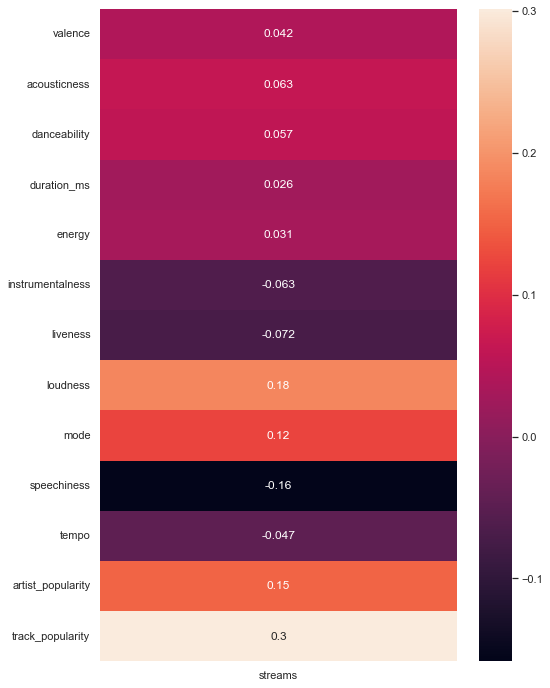

In [104]:
streams = stream.corr().loc[['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness'
, 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'artist_popularity','track_popularity'],['streams']]

plt.subplots(figsize=(8, 12))
sns.heatmap(streams,annot=True)
sns.set(font_scale = 1)

จากข้อเท็จจริงที่ได้:
- จะเห็นได้ว่าข้อมูลที่มีความสัมพันธ์ positive correlation กับยอด streams มากที่สุดคือ track_popularity ซึ่งถือว่ามีความสัมพันธ์กัน เพราะหากคนจะเริ่มฟังเพลง คงเริ่มฟังจากเพลงที่มีคนนิยมมากเป็นหลัก
- ข้อมูลที่มีความสัมพันธ์ positive correlation กับยอด streams รองลงมาคือ artist_popularity, mode, และ loudness
- ส่วนข้อมูลที่มีความสัมพันธ์ negative correlation กับ streams มากที่สุดคือ speechiness ทำให้เห็นแนวโน้มว่าคนมักจะนิยมฟังเพลงที่ไม่ได้มีคำร้องหรือท่อน rap มากขนาดนั้น จะนิยมฟังเพลงร้องธรรมดามากกว่า

### เลือก attributes มาใช้แค่บางตัว โดยเลือก attributes ที่มีความสัมพันธ์กับ streams มากที่สุด โดยวัดจากค่า correlation >= 0.12 ซึ่งคือ track_popularity, loudness, artist_populality, mode และ speechiness

<a id = "28"></a>
### ดูการกระจายตัวของ attributes ที่เลือกมา

<AxesSubplot:xlabel='track_popularity', ylabel='streams'>

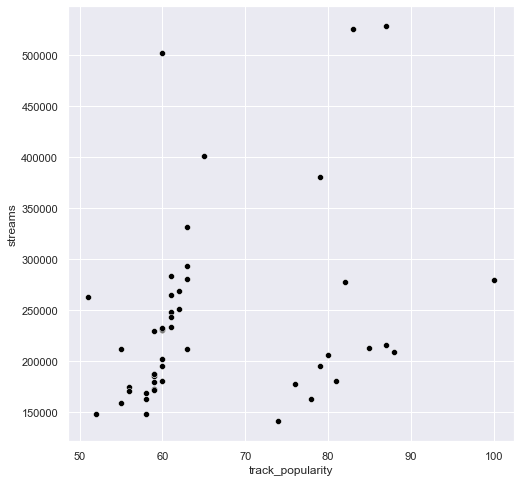

In [109]:
sns.scatterplot(x = 'track_popularity', y = 'streams', data = stream, color = 'black')

<AxesSubplot:xlabel='loudness', ylabel='streams'>

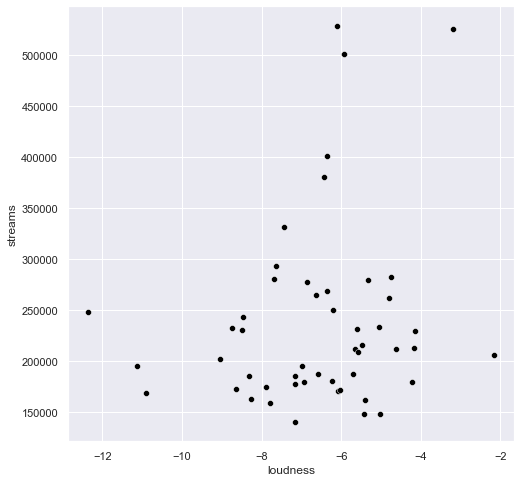

In [110]:
sns.scatterplot(x = 'loudness', y = 'streams', data = stream, color = 'black')

<AxesSubplot:xlabel='artist_popularity', ylabel='streams'>

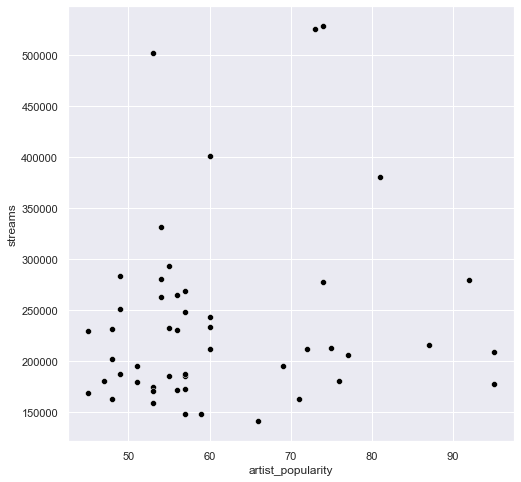

In [111]:
sns.scatterplot(x = 'artist_popularity', y = 'streams', data = stream, color = 'black')

<AxesSubplot:xlabel='mode', ylabel='streams'>

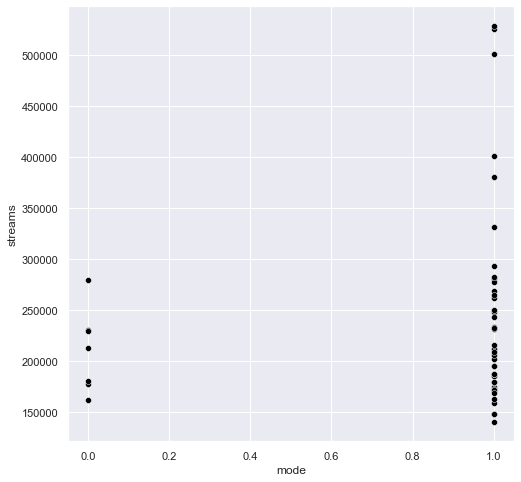

In [112]:
sns.scatterplot(x = 'mode', y = 'streams', data = stream, color = 'black')

<AxesSubplot:xlabel='speechiness', ylabel='streams'>

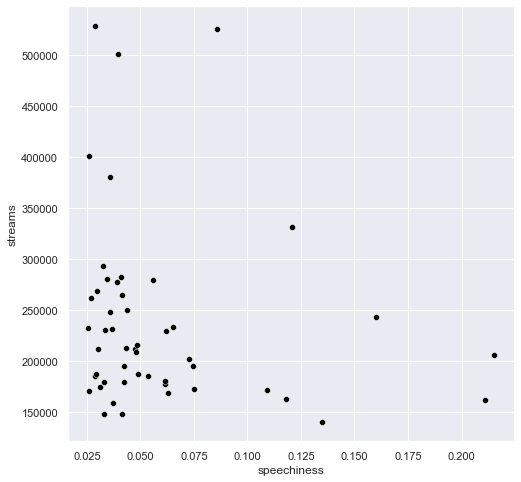

In [113]:
sns.scatterplot(x = 'speechiness', y = 'streams', data = stream, color = 'black')

<a id = "29"></a>
### Fit model

In [105]:
xs=stream.drop(columns=['streams','danceability','tempo', 'instrumentalness','acousticness', 'liveness', 'energy', 'valence', 'duration_ms'])
ys=stream['streams']

In [106]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, 
                                                    test_size=0.3,
                                                    random_state=9)
model=LinearRegression()
model.fit(xs_train, ys_train)
model.score(xs_test, ys_test)
print(f'model train score = {model.score(xs_train, ys_train)}')
print(f'model test score = {model.score(xs_test, ys_test)}')

model train score = 0.13341212316033768
model test score = 0.2848632529806524


model นี้มีความ underfitting กล่าวคือค่าความแม่นยำตอน train ได้ 0.13 แต่ตอน test ความแม่นยำเพิ่มขึ้นเป็น 0.28 ซึ่งเพิ่มความแม่นยำขึ้นมา 1 เท่า ทำให้การ predict ค่า stream ที่ได้ออกมาอาจจะไม่ได้แม่นยำมาก แต่ก็ไม่ได้แตกต่างมากขนาดที่คำนวนพลาดจนไม่สามารถดูแนวโน้มได้

### Predict ยอด streams

In [107]:
y_pred3=model.predict(xs_test)

dt3=pd.concat([ys_test.reset_index(), pd.Series(y_pred3, name='predicted')], axis='columns')
dt3

,index,streams,predicted
0,21,229586,220073.247361
1,37,208862,262413.390777
2,2,525452,278067.266152
3,14,247549,221657.071877
4,44,158800,222593.412730
5,7,280233,251061.721420
6,15,250317,258066.721297
7,20,231100,258046.676414
8,32,184619,223975.118852
9,25,195019,249614.844542


จาก model ข้างต้น จะเห็นได้ว่าค่า attributes ต่างๆ ไม่ได้ส่งผลต่อยอด stream เพลงในไทยมากขนาดนั้น เนื่องจากมีค่าความแม่นยำอยู่ที่ 0.28 จึงกล่าวได้ว่ายอด stream เพลงในไทยขึ้นอยู่กับปัจจัยภายนอกมากกว่า เช่น การทำหารตลาดของเพลง ความชอบของคนไทยในแต่ละช่วง กระแสของเพลง(นำไปลง tiktok) ซึ่งสิ่งต่าง ๆ จะเป็นตัวกำหนดยอด stream เพลงในไทยมากกว่าลักษณะการทำเพลง ดังนั้น ไม่ว่าจะเป็นศิลปินไทยท่านใด ก็มีโอกาสที่จะได้ยอด stream เพลงสูงถ้าทำการตลาดและสร้างกระแสให้กับเพลงได้อย่างถูกวิธี

<a id = "24"></a>
## สรุปข้อสังเกตจากการ predict ค่า track_popularity และยอด streams
การนำ model ไม่สามารถ predict ค่าได้แม่นยำขนาดนั้น เนื่องจากว่ามีปัจจัยภายนอกมากมายที่ส่งผลกระทบต่อความนิยมและยอด streams ของเพลง จะเห็นได้จากค่าความ fit model ที่ไม่สูงมาก และ predict ได้ตรงบ้าง ไม่ตรงบ้าง ดังนั้น หากศิลปินท่านใดต้องการให้เพลงของตนเองเป็นที่นิยม และมียอด streams สูงนอกจากจะให้ความสนใจในด้านลักษณะ mood, properties, และ context ของเพลงแล้ว ยังต้องให้ความสนใจกับการทำการตลาดเพลง ให้เป็นที่นิยมอีกด้วย เพราะไม่ว่าเพลงจะดีแค่ไหน หากขาดการทำการตลาดที่ถูกวิธีก็จะไม่ได้รับความนิยมอย่างที่คาดหวัง

---

<a id = "25"></a>
# <span style=color:lemonchiffon> **ประโยชน์อื่น ๆ** </span> 

1. ที่สามารถใช้ Machine Learning ในสร้าง Model ได้
   -    การที่ Spotify ใช้ Machine Learning เพื่อสร้าง Song Recommendation System ที่มีการใช้จริงในบริษัทของ Spotify ด้วย Big data ที่ได้จากผู้ใช้ Spotify ทั่วโลก
   -    ศึกษาได้ที่: https://towardsdatascience.com/part-iii-building-a-song-recommendation-system-with-spotify-cf76b52705e7

2. ข้อมูลอื่น ๆ ที่สามารถนำมาใช้วิเคราะห์ได้
    - ข้อมูลของ Artist: https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets